# **INFO 2950 Project**

***Authored by: Kenneth Shen (ks889)***

# **1. Introduction**
The film industry is more popular than ever as movies made an estimated $42.2 billion in 2019. Global box office revenue was predicted to increase in 2020. Movie budgets have steadily increased over the last two decades, as film studios put more and more money into creating bigger movies with well-known director and actors, hoping that a movie with big box office. Since the first movies were produced, people have been trying to figure out what exactly makes a movie a “success”. What common factors do successful movies have? How much does a director matter? Is star power real?

In this project, I will perform analysis on a large dataset of approximately 4000 movies from rotten tomatoes movies database and the-numbers database. The data  includes many different types of information about each movie, ranging from box office, budget, well-known director, and the number of movie stars, to other information such as runtime, genre, critics score, audience score, audience count, and movie release month. I will analyze this dataset to determine what factors contribute to a movie's box office and whether those factors lead to a successful (hit) movie. For this analysis, I will define hit or flop movies in financial terms: how successful or how many times larger box office is when compared to the movie’s budget. 

I will begin my analysis by performing some descriptive analytics on the dataset. Through this analysis, I will show some interesting trends in the data pertaining to what successful movies have in common. This analysis will mainly be done through the examination of charts.

I will then perform some predictive analytics on the dataset. Through this analysis, I will first provide a model for predicting box office revenue, then examine the factors that are significant to those predictions. I will then provide a model for predicting whether a movie will be a hit or flop as well as the factors that are significiant to those predictions.

# **2. Data Description**

## **2.1 Overview**

For this project, I created an analysis dataset by merging source data rotten tomatoes movies dataset and box office dataset by movie title and movie release year. Additional variables are derived in analysis dataset.

**Data cleaning and source code are at section 9 Appendix and 10 source code. Analysis dataset is loaded to Cornell box at ()**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn import datasets, linear_model
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from scipy import stats
sns.set_palette("colorblind")

## **2.2 What are the observations (rows) and the attributes (columns)?**

**The observations are unique movie records by merging rotten tomatoes movies dataset and box office dataset.**

In [ ]:
#Read csv data
df_rt_bx = pd.read_csv("rottentomatoes_boxoffice.csv",
    parse_dates=True,
    infer_datetime_format=True,
    low_memory=False,
    encoding="ISO-8859-1")

In [ ]:
df_rt_bx.info();

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3841 entries, 0 to 3840
Data columns (total 37 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   movie_title            3841 non-null   object 
 1   content_rating         3841 non-null   object 
 2   genres                 3841 non-null   object 
 3   directors              3841 non-null   object 
 4   actors                 3841 non-null   object 
 5   original_release_date  3841 non-null   object 
 6   runtime                3841 non-null   float64
 7   tomatometer_status     3841 non-null   object 
 8   tomatometer_rating     3841 non-null   float64
 9   audience_status        3841 non-null   object 
 10  audience_rating        3841 non-null   float64
 11  audience_count         3841 non-null   float64
 12  releaseYear            3841 non-null   int64  
 13  budget                 3841 non-null   float64
 14  d_gross                3841 non-null   float64
 15  w_gr

**Attributes are budget, box office and other information.**<br>

**Attribute description:** <br>

**`movie_title`**: Title of the movie as displayed on the Rotten Tomatoes website.<br>
**`content_rating`**: Content rating category based on the movie suitability for audience.<br>
**`genres`**: Movie genres separated by comma, if multiple.<br>
**`directors`**: Name of directors separated by comma, if multiple.<br>
**`actors`**: Name of actors separated by comma, if multiple.<br>
**`original_release_date`**: Date in which the movie has been released.<br>
**`runtime`**: Movie length in minutes.<br>
**`tomatometer_status`**: The tomatometer score categorized by Certified Fresh/Fresh/Rotten.

*   Fresh: When at least 60% of reviews for a movie or TV show are positive, a red tomato is displayed to indicate its Fresh status.
*   Rotten: When less than 60% of reviews for a movie or TV show are positive, a green splat is displayed to indicate its Rotten status.
*   Certified Fresh: Certified Fresh status is a special distinction awarded to the best-reviewed movies and TV shows. More detail is available at [https://www.rottentomatoes.com/about](https://www.rottentomatoes.com/about).<br>

**`tomatometer_rating`**: The tomatometer score represents the percentage of professional critic reviews that are positive for a given film or television show. A tomatometer score is calculated for a movie or TV show after it receives at least five reviews.<br>
**`audience_status`**: The audience score, denoted by a popcorn bucket.<br>

*   Upright: When at least 60% of users give a movie or TV show a star rating of 3.5 or higher, a full popcorn bucket is displayed to indicate its Fresh status.
*   Spilled: When less than 60% of users give a movie or TV show a star rating of 3.5 or higher, a tipped over popcorn bucket is displayed to indicate its Rotten status.<br>

**`audience_rating`**: The audience score, represents the percentage of users who have rated a movie or TV show positively. <br>
**`audience_count`**: The number of audiences submitted rating<br>
**`releaseYear`**: The year of original_release_date.<br>
**`budget`**: Movie production budget.<br>
**`d_gross`**: Domestic box office.<br>
**`w_gross`**: Worldwide box office.<br>
**`releaseMonth`**: The month of original_release_date.<br>
**`hit_flop_flag`**: Hit or flop movie flag derived from ratio of budget to worldwide box office that indicates whether a movie was a hit or a flop.<br>
**`hit_flop_flag_n`** Hit or flop movie flag in numeric value. 0=flop, 1=hit.<br>
**`main_genre`**: Main genre derived from genres. The first genre in the list of genres was assigned as main genre.<br>
**`g_genre`**: Grouped genre derived from main genre. Main genres such as Art House & International, Animation, Mystery & Suspense, Documentary, Classics, Kids & Family, Science Fiction & Fantasy, Musical & Performing Arts, Romance, Cult Movies, Western were grouped into Other.<br>
**`g_genre_n`**: Grouped genre in numeric value. 1=Action & Adventure, 2=Animation, 3=Comedy, 4=Drama, 5=Horror, 6=Mystery & Suspense, 7=Other. <br>
**`g_audience_count`**: Audience count group derived from audience_count per rotten tomatoes audience count categories.<br>
**`g_audience_count_n`**: Audience count group in numeric value. 1=less than 1000, 2=1000+, 3=2500+, 4=5000+, 5=10000+,6=25000+,7=50000+,8=100000+,9=250000+ <br>
**`g_content_rating`**: Grouped content rating derived from content_rating. G was grouped into PG. NC17 and UR were grouped into R.<br>
**`g_content_rating_n`**: Grouped content rating in numeric value. 1=G, 2=PG, 3=PG-13, 4=NR, 5=R. <br>
**`main_director`**: Main director derived from directors. The first name in a list of directors was assigned as main director.<br>
**`pop_director`**: Popular director derived from main_director. pop_direct = 1 if main_director is one of the top 100 directors according to life time box office.<br>
**`main_actor1`**: Main actor 1 derived from actors. The first name in a list of actors was assigned as main_actor1.<br>
**`main_actor2`**: Main actor 2 derived from actors. The second name in a list of was assigned as main_actor2.<br>
**`pop_actor`**: The number of popular actors derived from main_actor1 and main actor2. pop_actor=1 if one actor is ranked top 100 actors according to box office for any year. pop_actor=2 if two actors are ranked top 100 actors according to box office in any year.<br>
**`g_runtime`**: Grouped runtime derived from runtime. 1=0-90, 2=91-135, 3=136+. <br>
**`g_tomatometer_rating`**: Grouped tomatometer_rating derived from tomatometer_rating. 1=0-10, 2=11-20, 3=21-30, 4=31-40, 5=41-50, 6=51-60, 7=61-70, 8=71-80, 9=81-90, 10=91-100. <br>
**`g_audience_rating`**: Grouped audience_rating derived from audience_rating. 1=0-10, 2=11-20, 3=21-30, 4=31-40, 5=41-50, 6=51-60, 7=61-70, 8=71-80, 9=81-90, 10=91-100. <br>
**`tomatometer_status_n`**: Tomatometer score in numeric value. 0=Rotten, 1=Fresh, 2=Certified fresh. <br>
**`audience_status_n`**: Audience score in numeric value. 0=Spilled, 1=Upright. <br>
**`g_tomatometer_status`**: Grouped tomatometer scores. Certified-Fresh and Fresh were combined as Fresh.


##  **2.3 Why was this dataset created?** 

The original datasets are rotten tomatoes movies dataset containing information about 17,712 movies with 22 attributes, and box office dataset containing information about budget, domestic box office, and worldwide box office for 6,181 movies. 

I merged the two datasets by movie title and release year and got 3841 matched movies. The analysis dataset was created to analyze the impact various factors have on the box office and success of a movie, with particular attention given to tomatometer_rating, audience_rating, pop_director, pop_actor, releaseMonth, budget, and main_genre. This dataset was created to identify the correlation between different attributes, and answer questions such as "How do factors such as tomatometer_rating and audience_rating relate to a movie's box office?", "How does the movie ratings by critics compare to those by ordinary viewers?", and "How do the box office and budget relate to how successful a movie is?". The dataset was also created to fit muiltivariate linear regression model to predict movies box office and fit logistic regression model to predict hit or flop movie. 

## **2.4 What processes might have influenced what data was observed and recorded and what was not?**

**Rotten tomatoes movies dataset**<br>

In the rotten tomatoes movies dataset, the type of data observed and recorded is influenced by concerns of usefulness and measurability.

Attributes like movie_title, content_rating, genres, directors, and actors contain the details about each movie.

Attributes like tomatometer_rating, tomatometer_status, audience_rating, audience_status, and audience_count are collected to measure each movie's popularity, quality, and enjoyability.

Because of privacy concerns, reviewer characteristics such as race, age group, and gender of both critics and audiences were not collected.

**Box office dataset**

The purpose of the data collected is to show movie budget and box office in numbers. So movies in which budget is unavailable were not included.

In the box office dataset, the type of data observed and recorded is influenced by level of comparability and measurability. 

Attribute budget is used to rank movies from highest budget to lowest budget.

Variable domestic gross and worldwide gross are used to measure revenue and profit against budget.

Distribution budget (or marketing cost) is not collected because it is either difficult to collect or not publicly available as each company's distribution budget is secret.

## **2.5 What preprocessing was done, and how did the data come to be in the form that you are using?**

### **2.5.1 Raw data cleaning**

**Rotten tomatoes movies dataset:**

1.   Attributes rotten_tomatoes_link, movie_info, critics_concensus, streaming_release_date, production_company, tomatometer_top_critics_count, tomatometer_fresh_critics_count, and
tomatometer_rotten_critics_count are removed because they are either irrelavent or not used for analysis.
2.   Records with missing value in variables movie_title, runtime, original_release_date, content_rating, genres, tomatometer_status, audience_status, and audience_count were removed because movie_title and original_release_date are the keys used to merge with box office dataset. Attributes content_rating, genres, tomatometer_status, audience_status, and audience_count were used for analysis but couldn't be imputed (could not estimate a value for the missing variables).
3.   Converted original_release_date from string to date type.
4.   Removed duplicate records by keys i.e., movie_title and original_release_year.

**Box office dataset:**

It had been examined that there are no missing values in any of the fields of box office dataset. But we need to:

1.   Remove records with invalid values for records in which domestic box office and worldwide box office = 0. 
2.   Remove records with invalid values for records with release date = unknown. 
3.   Convert release date (rel_date) from string to date type.
4.   Convert numeric value with "$" from string to numeric type.
5.   Remove attribute ID from the dataset since it is irrelevant.
6.   Remove outlier (revenue > \\$1.5 billion).


### **2.5.2 Data integration and preparation**

How can you make models better by improving the quality of the data going into them? For the most part, this is not a matter of obtaining additional data sources; it is about defining new variables that express the information inherent in the data in ways that make the information more useful or more readily available. Derived variables can improve model performance and enhance the ability of models to be understood and interpreted.

In this project, I had done multiple ways to create new variables taking advantage of important characteristics already known. I extracted movie release month from movie release date. I derived hit/flop flag defining a successful movie or not. I derived popular director and actors from director and actor list. I also derived categorical variables from continuous attributes and created variables by regrouping caregories of existing categorical attributes.

1.   **Merged rotten tomatoes movies dataset and box office dataset** <br>
     The two datasets were merged by movie title and release year. Only matched records were kept. Then removed variables rel_date, rel_year and movie which are not needed for analysis
2.   **Derived movie release month**<br>
     Timing of movie release (timing is usually examed by month) could impact box office significantly. For example, holiday season is used to attracting more audiences.
3.   **Derived hit/flop movie flag**<br>
     There is a lot different definition of hit/flop movie. Because of data limitation, I followed the definition below: <br>
     If we’ll simplify it to the formula, we’ll see, that for movies with budgets over \\$50 million: <br>
     Movie that earned more than 4x budget+marketing - is a super hit.<br>
     Movie that earned more than 2.5x budget+marketing - is a blockbuster.<br>
     Movie that earned more than 1.5x budget+marketing - would be a minor success.<br>
     Movie that earned less than budget+marketing - would be a flop.<br>
     Movie that earned less than 3/4 of budget+marketing - would be a box office bomb.<br>
     For movies under \\$1-49 million:<br>
     Movie that earned more than 2x budget+marketing - is a hit.<br>
     Movie that earned more than 1.3x budget+marketing - would be a minor success.<br>
     For movies under \\$1 million:<br>
     Movie that earned 2x budget+marketing - is a great success.<br>
     Movie that earned more than budget+marketing - is a big success.<br>
     Movie that received distribution and earned at least something in the office - is a success.<br>
     source: [https://www.quora.com/What-are-the-criteria-for-a-movie-hit-super-hit-blockbuster-and-flop](https://www.quora.com/What-are-the-criteria-for-a-movie-hit-super-hit-blockbuster-and-flop)<br>
     A hit movie is defined as a blockbuster, a hit or big success. Because only production budget was collected, the assumption production budget accounted for the whole cost was applied.<br>
4.   **Derived main genre and created grouped genres variable**<br>
     In database, genre field includes multiple genres and is separated by comma, but only the first one is movie's main genre<br>
     There are more than ten different genres and most of them are unpopular genres. Only a small number of movies is in each genre. Using these levels as-is for modeling could lead to all sorts of issues because there are just so many. A lot of statistical precision would be thrown away to use them, and the results are hard to interpret. Also people are rarely interested in specific genres -- people are much more likely to be interested in broad categories (subgroups) of genres. By running frequency of genres, I grouped the genres other than Action & Adventure, Animation, Comedy, Drama, Horror, Mystery & Suspense which all have small number of movies to "Other".<br>
5.   **Derived audience count categorical variable**<br>
     The histogram shows a small number of movies received extremely high number of audience reviews (more than 10 times higher than other movies). I tried to verify the numbers on rotten tomatoes website, but for each movie, rotten tomatoes only shows the number of audience reviews in categories i.e. 250,000+, 100,000+, 50,000+, 25,000+, 10,000+, 5,000+, 2,500+, 1000+, 500+, 250+ ... ... For analysis, I mimicked rotten tomatoes way to create a categorical attribute following rotten tomatoes audience count categories. Because of small number in less than 1000 reviews categories, these categories are grouped into category "<1000".<br>
6.   **Created grouped content rating variable**<br>
     For the same reason as genres, I grouped NC17 to R. My grouping assumption is that NC17 and R have the similar audience population definition.<br>
7.   **Derive popular director**<br>
     Well-known director could impact box office significantly. I googled director rank. The popular ranking method is based on all time worldwide box office. I assigned the top 100 directors per box office as popular director<br>
8.   **Derived the number of popular actors**<br>
     Movie star is crucial to box office. I ranked actors based on yearly total worldwide box office for movies the actor is main actor. I counted the top 10 actors each year for movies released between 1990 and 2020 as popular actor. Because of limit movies released before 1990 in dataset,  I counted top 2 actors each year for movies released between 1980 and 1990, top 1 actor each year for movies released before 1980 as popular actor. For each movie, if one of the main actors is popular actor, pop_actor=1, if both of the main actors are popular actor, pop_actor=2.

9.  **Created variable grouping tomatometer rating and audience rating based on 0-100% scale.** <br>
    For analysis purpose, I divided tomatometer and audience rating based on 0-100% scale into 10 groups i.e. 0-10, 11-20, ... ... 91-100. This provides me the other way to learn data.

10.   **Created variable grouping tomatometer score**<br>
     For analysis purpose, I grouped Certified-Fresh into Fresh. Because Certified-Fresh is a subset of Fresh, the grouping strategy doesn't change the meaning of category Fresh. 

11. **Create numeric variables for all categorical variables**<br>
    For all categorical variables, I created a derived variable in numeric value for modeling purpose. 
   

## **2.6 Who funded the creation of the dataset?** 

This dataset did not receive any internal or external funding.

## **2.7 If people are involved, were they aware of the data collection and if so, what purpose did they expect the data to be used for?**

Only movies' cast and crew names are collected. The information is available to the general public with each movie's release. Director and actor names are ranked and used to examine relationship with a movie's box office and success (defined above according to ratio of box office to movie budget+marketing).

## **2.8 Where can your raw source data be found, if applicable? Provide a link to the raw data (hosted in a Cornell Google Drive or Cornell Box)** 

Rotten tomatoes movies dataset was from the website kaggle.com (https://www.kaggle.com/stefanoleone992/rotten-tomatoes-movies-and-critic-reviews-dataset). CSV file is uploaded to Cornell box at https://cornell.app.box.com/file/892644331904. 

Box office dataset is published on website the-numbers.com (https://www.the-numbers.com/movie/budgets/all). I scrapped data from the website and saved as csv file. The website is updated from time to time. My data was scraped on Sep 16, 2021. CSV file is updated to Cornell box at https://cornell.app.box.com/file/892785325109.

## **2.9 Source datasets description**

In [ ]:
#Read csv data
df_rt = pd.read_csv("rotten_tomatoes_movies.csv",
    parse_dates=True,
    infer_datetime_format=True,
    low_memory=False,
    encoding="ISO-8859-1")
df_bx = pd.read_csv("box_office.csv",
    parse_dates=True,
    infer_datetime_format=True,
    low_memory=False)

**Rotten tomatoes movies dataset**

**Dataset structure:**

In [ ]:
df_rt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17712 entries, 0 to 17711
Data columns (total 22 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   rotten_tomatoes_link              17712 non-null  object 
 1   movie_title                       17712 non-null  object 
 2   movie_info                        17391 non-null  object 
 3   critics_consensus                 9134 non-null   object 
 4   content_rating                    17712 non-null  object 
 5   genres                            17693 non-null  object 
 6   directors                         17561 non-null  object 
 7   authors                           16170 non-null  object 
 8   actors                            17369 non-null  object 
 9   original_release_date             16546 non-null  object 
 10  streaming_release_date            17328 non-null  object 
 11  runtime                           17398 non-null  float64
 12  prod

**Variable Description:**

**`rotten_tomatoes_link`**: Link from which the movies data have been scraped - e.g. the record "m/0814255" has been scraped from.<br>
**`movie_title`**: Title of the movie as displayed on the Rotten Tomatoes website.<br>
**`movie_info`**: Brief description of the movie.<br>
**`critics__concensus`**: Comment from Rotten Tomatoes.<br>
**`content_rating`**: Category based on the movie suitability for audience.<br>
**`genres`**: Movie genres separated by comma, if multiple.<br>
**`directors`**: Name of directors. names separated by comma, if multiple.<br>
**`authors`**: Name of screen writers. names separated by comma, if multiple.<br>
**`actors`**: Name of actores. names are separated by comma, if multiple.<br>
**`original_release_date`**: Date in which the movie has been released.<br>
**`streaming _release_date`**: Date in which the movie has been streamed online.<br>
**`runtime`**: Movie length in minutes.<br>
**`production_company`**: Movie production company.<br>
**`tomatometer_status`**: The tomatometer score categorized by Certified Fresh/Fresh/Rotten

*   Fresh: When at least 60% of reviews for a movie or TV show are positive, a red tomato is displayed to indicate its Fresh status.
*   Rotten: When less than 60% of reviews for a movie or TV show are positive, a green splat is displayed to indicate its Rotten status.
*   Certified Fresh: Certified Fresh status is a special distinction awarded to the best-reviewed movies and TV shows. More detail is available at [https://www.rottentomatoes.com/about](https://www.rottentomatoes.com/about). <br>

**`tomatometer_rating`**: Tomatometer score represents the percentage of professional critic reviews that are positive for a given film or television show. A tomatometer score is calculated for a movie or TV show after it receives at least five reviews. <br>
**`audience_status`**: The audience score, denoted by a popcorn bucket.

*   Upright: When at least 60% of users give a movie or TV show a star rating of 3.5 or higher, a full popcorn bucket is displayed to indicate its Fresh status.
*   Spilled: When less than 60% of users give a movie or TV show a star rating of 3.5 or higher, a tipped over popcorn bucket is displayed to indicate its Rotten status.<br>

**`audience_rating`**: The audience score, represents the percentage of users who have rated a movie or TV show positively. <br>
**`audience_count`**: Number of audiences submitted rating.<br>
**`tomatometer_top_critics_count`**: Number of top critic reviews.<br>
**`tomatometer_fresh_critics_count`**: Number of positive critic reviews.<br>
**`tomatometer_rotten_critics_count`**: Number of negative critic reviews.<br>

**Box office dataset**

**Dataset structure:**

In [ ]:
df_bx.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6181 entries, 0 to 6180
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   ID        6181 non-null   object
 1   rel_date  6181 non-null   object
 2   movie     6181 non-null   object
 3   budget    6181 non-null   object
 4   d_gross   6181 non-null   object
 5   w_gross   6181 non-null   object
dtypes: object(6)
memory usage: 289.9+ KB


**Attribute description:**

**`ID`**: Ranking by budget.<br>
**`rel_date`**: Date in which the movie has been released.<br>
**`movie`**: Movie title.<br>
**`budget`**: Movie production budget.<br>
**`d_gross`**: Domestic box office.<br>
**`w_gross`**: Worldwide box office.<br>


# **3. Preregistration statement**

## Analysis #1: 

Hypothesis: Box office change associates with change in predictor budget, genre, content rating, popular director, the number of movie stars, movie runtime, critics and audiences review score, movie popularity and movie release month.

Analysis: Build multivariable linear regression model to predict box office using predictor budget, genre, content rating, popular director, the number of movie stars, movie runtime, tomatometer score, audience score, audience count and movie release month. I will then perform significance test. I will display the coefficients of each factor and calculate R square for the entire set. Also calculate MSE, RMSE and MAE. I will draw scatter plot of predicted box office vs actual box office to exam linearity. I will also draw scatter plot of residual vs each factor to exam homoscedastic. A normal quantile plot will be created too.

## Analysis #2: 

Hypothesis: There is relationship between hit/flop movie and predictor genre, content rating, popular director, the number of movie stars, movie runtime, critics and audiences review score, movie popularity and movie release month.

Analysis: Build logistic regression model to predict whether movie is success (hit movie) or not. Predictors are considered including content rating, popular director, the number of movie stars, runtime, tomatometer score, audience score, audience count and movie release month. A training and test datasets will be created to make sure model not overfit. I will then perform significance test. I will display the coefficients of each factor for the entire set. Cross validation, baseline accuracy, confusion matrix will be used to evaluate the model. I will also calculate AUC and draw ROC curve.


# **4. Data analysis**


## **4.1 Exploratory analysis - the general trends in box office revenue**

Hundreds of movies are produced each year with different factors contributing to their box office revenue. I would first like to explore the general trends between these contributing factors and box office revenue to gain insight into the relationship between them.

To that end, I will first look at the correlation between continuous variables and box office revenue and then proceed with some visualizations to understand the relationships between categorical variables and box office revenue through the use of box plots.

### **4.1.1 Correlation between worldwide box office and domestic box office**

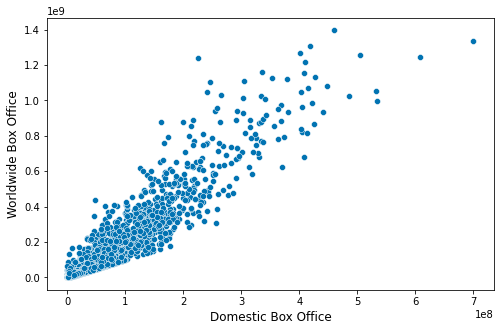

In [ ]:
#1. Correlation between worldwide box office and domestic box office
plt.figure(figsize=(8, 5))
sns.scatterplot(x="d_gross", y="w_gross", data=df_rt_bx)
plt.xlabel("Domestic Box Office", size=12)
plt.ylabel("Worldwide Box Office", size=12);

In [ ]:
print ("correlation: %.2f" % df_rt_bx['d_gross'].corr(df_rt_bx['w_gross']).round(2))

correlation: 0.94


There is a strong, positive correlation between worldwide box office and domestic box  office (correlation = 0.94). This means that a higher worldwide box office indicates a higher domestic box office and vice versa. This makes sense as I would expect the standards for a good movie to be more-or-less consistent across the world with exceptions of cultural differences and such that explain why there is not a perfect correlation. I would also expect that movies that are able to achieve a high worldwide box office are able to achieve a high domestic box office as they have global appeal. So in all our following analyses, we will only analyze the relationships between worldwide box office and related factors.

### **4.1.2 Correlation between worldwide box office and budget**

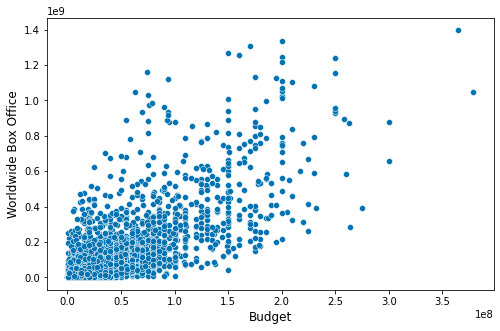

In [ ]:
#2. Correlation between worldwide box office and budget
plt.figure(figsize=(8, 5))
sns.scatterplot(x="budget", y="w_gross", data=df_rt_bx)
plt.xlabel("Budget", size=12)
plt.ylabel("Worldwide Box Office", size=12);

In [ ]:
print ("Correlation %.2f" % df_rt_bx['budget'].corr(df_rt_bx['w_gross']).round(2))

Correlation 0.74


There is a positive correlation (correlation = 0.74) between worldwide box office and budget. This indicates that there is a tendency for an increase in budget to be followed by a rise in worldwide box office. A higher budget with allow for hiring well-known directors and actors, more staff, higher-end production equipment, etc. With more resources, the production crew can create higher quality movies that have a higher chance appealing to a global audience and generating a higher box office.

### **4.1.3 Correlation between worldwide box office and movie runtime**

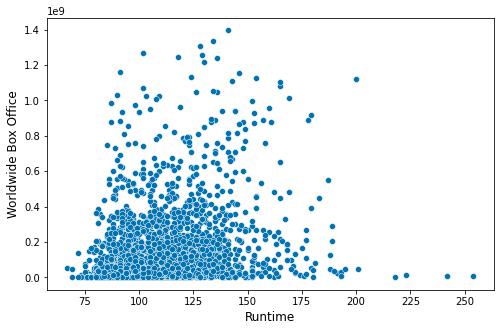

In [ ]:
#3. Correlation between worldwide box office and movie runtime
plt.figure(figsize=(8, 5))
sns.scatterplot(x="runtime", y="w_gross", data=df_rt_bx)
plt.xlabel("Runtime", size=12)
plt.ylabel("Worldwide Box Office", size=12);

In [ ]:
print ("Correlation: %.2f" % df_rt_bx['runtime'].corr(df_rt_bx['w_gross']).round(2))

Correlation: 0.27


There is a weak, positive correlation (correlation = 0.27) between worldwide box office and runtime. This indicates runtime has little influence on worldwide box office, though it seems that movies with high worldwide box office typically do not exceed 200 minutes.

### **4.1.4 Compare worldwide box office by number of audience reviews**

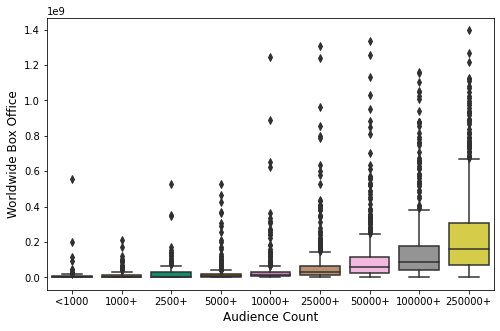

In [ ]:
#4. Compare worldwide box office by audience count
plt.figure(figsize=(8, 5))
sns.boxplot(x="g_audience_count", y="w_gross", 
            order=["<1000","1000+","2500+","5000+","10000+","25000+","50000+","100000+","250000+"],
            data=df_rt_bx)
plt.ylabel("Worldwide Box Office", size=12)
plt.xlabel("Audience Count", size=12);

The box plot shows that movies with a higher number of audience reviews are more likely to have a higher box office. This difference shows clearer in movies with more than 50,000 audience reviews. Movies with more than 250,000 audience reviews have a median worldwide box office that is close to $200 million, which is well above the rest. This is expected as movies with a higher worldwide box office have more people who have watched it and, as a result, a larger audience base who are able to give a review.

### **4.1.5 Compare worldwide box office by top ranked director status**

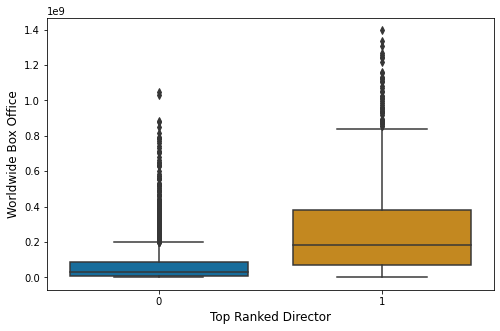

In [ ]:
#5. Compare worldwide box office by top ranked director status
plt.figure(figsize=(8, 5))
sns.boxplot(x="pop_director", y="w_gross", data=df_rt_bx)
plt.ylabel("Worldwide Box Office", size=12)
plt.xlabel("Top Ranked Director", size=12);

The box plot shows that movies with a top ranked director are more likely have higher box office as the median of the right box plot (1 top director) is higher than the median of the left box plot (0 top director). This is expected as a top ranked director is able to guide the creative vision for a movie towards global appeal.

### **4.1.6 Compare worldwide box office by number of movie stars**

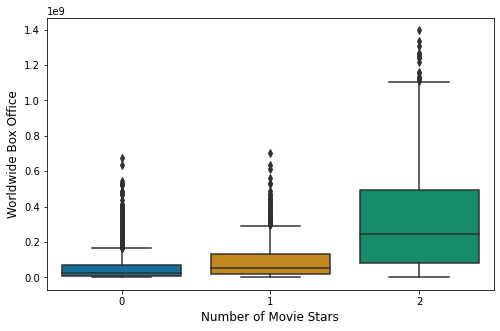

In [ ]:
#6. Compare worldwide box office by number of movie stars
plt.figure(figsize=(8, 5))
sns.boxplot(x="pop_actor", y="w_gross", data=df_rt_bx)
plt.ylabel("Worldwide Box Office", size=12)
plt.xlabel("Number of Movie Stars", size=12);

The box plot shows that movies with 2 movie stars are much more likely to have a higher box office as the median of the green box plot (2 movie stars) is higher than the median of the blue (0 movie star) and orange (1 movie star) box plots. There is little difference in box office sales between movies with 1 movie star and no movie star.

### **4.1.7 Compare worldwide box office by tomatometer score**


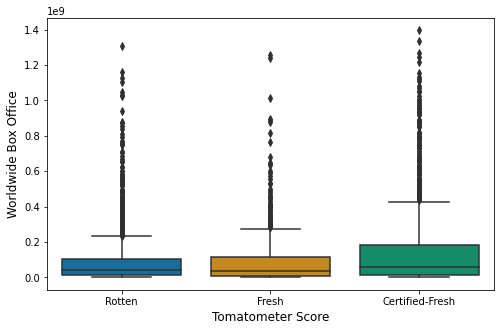

In [ ]:
#7. Compare worldwide box office by tomatometer score
plt.figure(figsize=(8, 5))
sns.boxplot(x="tomatometer_status", y="w_gross", data=df_rt_bx, order=['Rotten', 'Fresh', 'Certified-Fresh'])
plt.ylabel("Worldwide Box Office", size=12)
plt.xlabel("Tomatometer Score", size=12);

The box plot shows that certified-fresh movies have slightly higher box office which indicates tomatometer score has little effect on box office because many people would have watched movies before tomatometer scores come out.



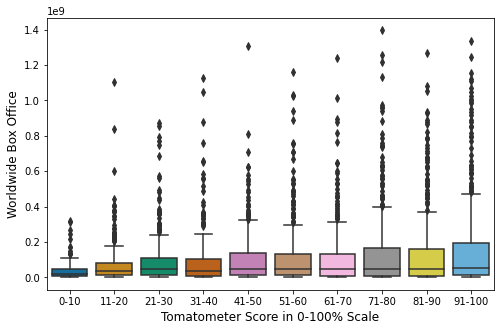

In [ ]:
#7.1. Compare worldwide box office by tomatometer rating group
plt.figure(figsize=(8, 5))
g=sns.boxplot(x="g_tomatometer_rating", y="w_gross", data=df_rt_bx)
g.set_xticklabels(['0-10','11-20','21-30','31-40','41-50','51-60','61-70','71-80','81-90','91-100'])
plt.ylabel("Worldwide Box Office", size=12)
plt.xlabel("Tomatometer Score in 0-100% Scale", size=12);

But when I re-drew the box plot by using the regouped 0-100% scale tomatometer scores in 10% increment, from 41-100%, the median seems to stay at the same level but the interquartile range gradually becomes larger. This shows that of the highly-rated movies rated 91-100%, the movies that perform better than the median have very high box office.

### **4.1.8 Compare worldwide box office by audience score**



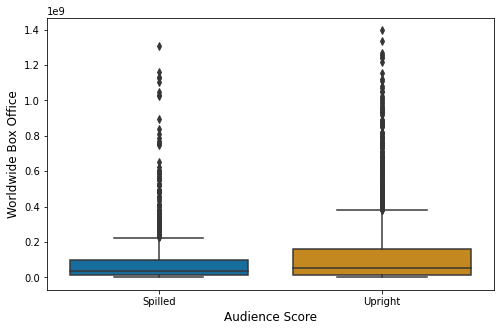

In [ ]:
#8. Compare worldwide box office by audience score
plt.figure(figsize=(8, 5))
sns.boxplot(x="audience_status", y="w_gross", data=df_rt_bx)
plt.ylabel("Worldwide Box Office", size=12)
plt.xlabel("Audience Score", size=12);

The box plot shows that audience score has little effect on box office because many people would have watched movies before audience scores come out.

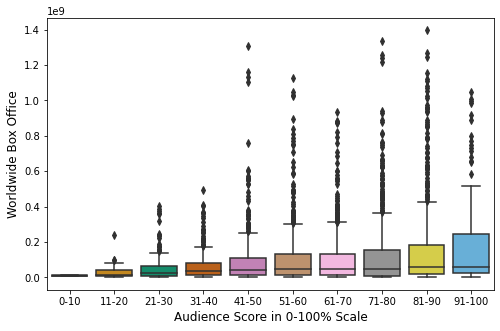

In [ ]:
#8.1. Compare worldwide box office by audience rating group
plt.figure(figsize=(8, 5))
g=sns.boxplot(x="g_audience_rating", y="w_gross", data=df_rt_bx)
g.set_xticklabels(['0-10','11-20','21-30','31-40','41-50','51-60','61-70','71-80','81-90','91-100'])
plt.ylabel("Worldwide Box Office", size=12)
plt.xlabel("Audience Score in 0-100% Scale", size=12);

The box plot shows the same trend as tomatometer score plot. The median seems to stay at the same level but the interquartile range gradually becomes larger. This shows that of the highly-rated movies rated 91-100%, the movies that perform better than the median have very high box office.

### **4.1.9 Compare worldwide box office by genre**

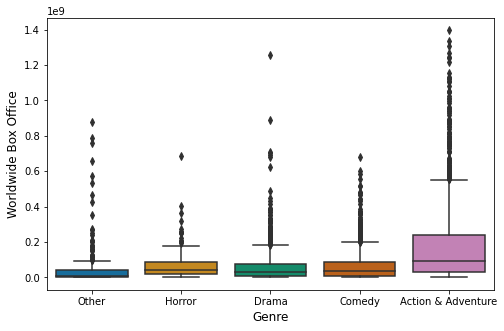

In [ ]:
#9. Compare worldwide box office by genre
plt.figure(figsize=(8, 5))
sns.boxplot(x="g_genre", y="w_gross", order=['Other', 'Horror', 'Drama', 'Comedy','Action & Adventure' ], data=df_rt_bx)
plt.ylabel("Worldwide Box Office", size=12)
plt.xlabel("Genre", size=12);

The box plot shows that movies in the action & adventure genre outperform movies of other genres.

### **4.1.10 Compare worldwide box office by content rating**


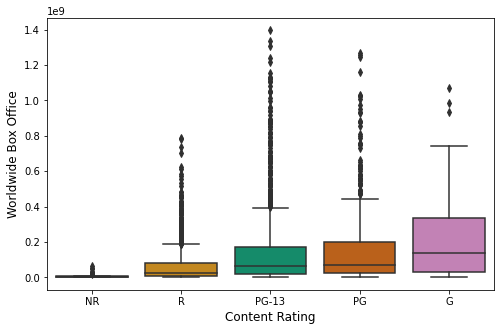

In [ ]:
#10. Compare worldwide box office by content rating
plt.figure(figsize=(8, 5))
sns.boxplot(x="g_content_rating", y="w_gross", order=['NR', 'R', 'PG-13', 'PG', 'G'], data=df_rt_bx)
plt.ylabel("Worldwide Box Office", size=12)
plt.xlabel("Content Rating", size=12);

The box plot shows that G, PG and PG-13 rated movies typically has higher box office than R rated movies, since G, PG and PG-13 movies have a wider audience range.

### **4.1.11 Compare worldwide box office by movie release month**

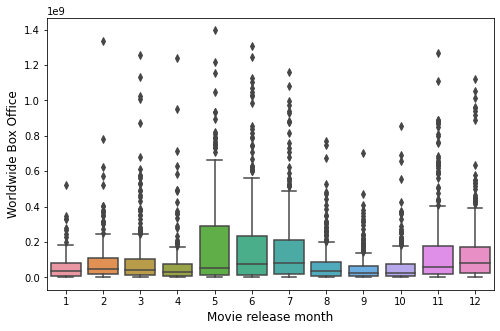

In [ ]:
#11. Compare worldwide box office by movie release month
plt.figure(figsize=(8, 5))
sns.boxplot(x="releaseMonth", y="w_gross", data=df_rt_bx)
plt.ylabel("Worldwide Box Office", size=12)
plt.xlabel("Movie release month", size=12);

The box plot shows that summer and holiday seasons (winter) have higher box office as kids are out of school and people are more likely to take breaks and go to see movies.

## **4.2 Exploratory analysis - the general trends in successful movies**

Now I will begin performing some descriptive analytics between the hit/flop flag and different factors. Through this analysis, I will show some interesting trends in the data pertaining to what successful movies have in common and what factors might affect movie success.

### **4.2.1 Compare worldwide box office by hit and flop movies**

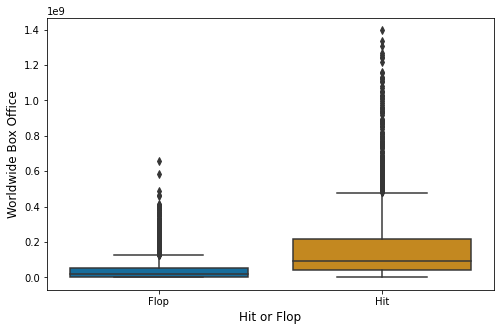

In [ ]:
#12. Compare worldwide box office by hit and flop movies
plt.figure(figsize=(8, 5))
sns.boxplot(x="hit_flop_flag", y="w_gross", data=df_rt_bx)
plt.ylabel("Worldwide Box Office", size=12)
plt.xlabel("Hit or Flop", size=12);

The box plot shows that movies with a higher box office are more likely to be a hit movie. This is expected as there is a minimum cost required to produce a movie, so movies with a low box office are unlikely to outpace cost by a signficant amount. For movies with a high box office, cost may not increase as quickly as revenue, so revenue can outgrow cost by a significant amount.



### **4.2.2 Compare budget by hit and flop movies**

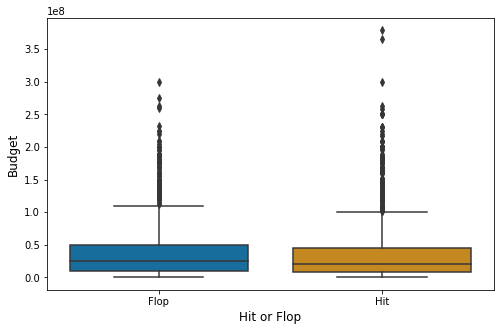

In [ ]:
#13. Compare budget by hit and flop movies
plt.figure(figsize=(8, 5))
sns.boxplot(x="hit_flop_flag", y="budget", data=df_rt_bx)
plt.ylabel("Budget", size=12)
plt.xlabel("Hit or Flop", size=12);

Because hit/flop is a ratio of box office to budget. The plot shows higher budget does not necessarily to lead to a hit movie. Actually there is a slightly higher probability to be a flop movie.

### **4.2.3 Compare runtime for hit and flop movies**

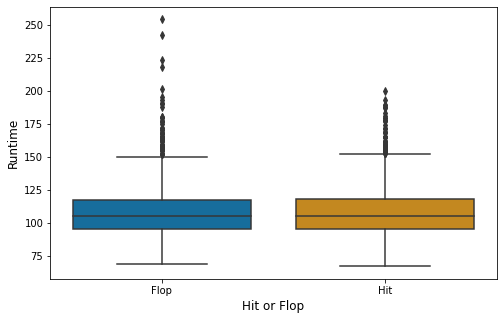

In [ ]:
#14. Compare runtime by hit and flop movies
plt.figure(figsize=(8, 5))
sns.boxplot(x="hit_flop_flag", y="runtime", data=df_rt_bx)
plt.ylabel("Runtime", size=12)
plt.xlabel("Hit or Flop", size=12);

The box plot shows that there is no difference in movie runtime between hit and flop movies.

### **4.2.4 Compare audience rating by hit and flop movies**

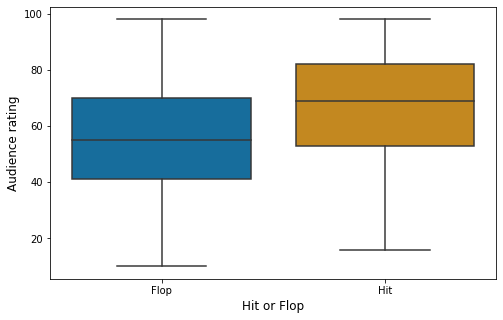

In [ ]:
#15. Compare audience rating by hit and flop movies
plt.figure(figsize=(8, 5))
sns.boxplot(x="hit_flop_flag", y="audience_rating", data=df_rt_bx)
plt.ylabel("Audience rating", size=12)
plt.xlabel("Hit or Flop", size=12);

The box plot shows that hit movies have a higher audience rating than flop movies. This makes sense as highly rated movies likely appeal to most people and are, thus, likely to perform well financially.

### **4.2.5 Compare critic rating by hit and flop movies**

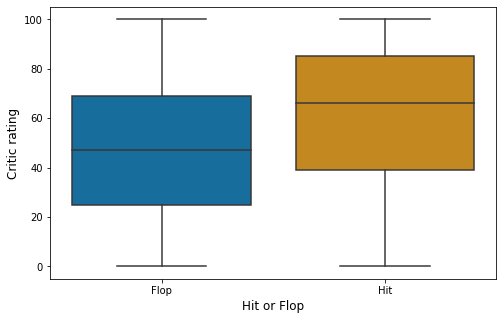

In [ ]:
#16. Compare critic rating by hit by flop movies
plt.figure(figsize=(8, 5))
sns.boxplot(x="hit_flop_flag", y="tomatometer_rating", data=df_rt_bx)
plt.ylabel("Critic rating", size=12)
plt.xlabel("Hit or Flop", size=12);

The box plot shows that hit movies have a higher critic rating than flop movies. This makes sense as highly rated movies likely appeal to most people and are, thus, likely to perform well financially.

### **4.2.6 Compare hit and flop movies by movie release month**

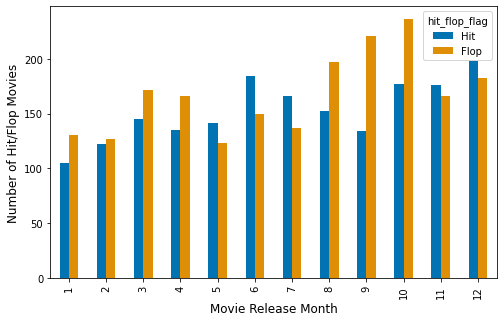

In [ ]:
#17. Compare hit and flop movies by movie release month
df_rt_bx_stackbar = df_rt_bx.groupby(['releaseMonth', 'hit_flop_flag'])['releaseMonth'].count().unstack('hit_flop_flag').fillna(0)
#df_rt_bx_stackbar[['Hit','Flop']].plot(kind='bar', stacked=True)
df_rt_bx_stackbar[['Hit','Flop']].plot(kind='bar', stacked=False, figsize=(8,5));
plt.ylabel("Number of Hit/Flop Movies", size=12)
plt.xlabel("Movie Release Month", size=12);

The bar chart shows that summer and holiday seasons have a higher number of hit movies than flop movies. This makes sense as people have more time to watch movies during the summer and holiday seasons, especially kids as they have time off of school during the summer.

### **4.2.7 Compare hit and flop movies by genre**

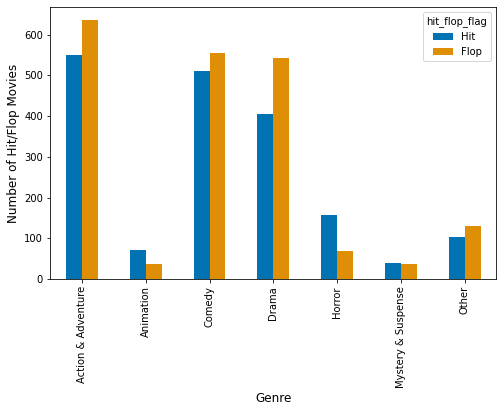

In [ ]:
#18. Compare hit and flop movies by genre
df_rt_bx_stackbar = df_rt_bx.groupby(['g_genre', 'hit_flop_flag'])['g_genre'].count().unstack('hit_flop_flag').fillna(0)
df_rt_bx_stackbar[['Hit','Flop']].plot(kind='bar', stacked=False, figsize=(8,5));
plt.ylabel("Number of Hit/Flop Movies", size=12)
plt.xlabel("Genre", size=12);

The bar chart shows that animation and  horror movies have a higher number of hit movies than flop movies.

### **4.2.8 Compare hit and flop movies by top ranked director**

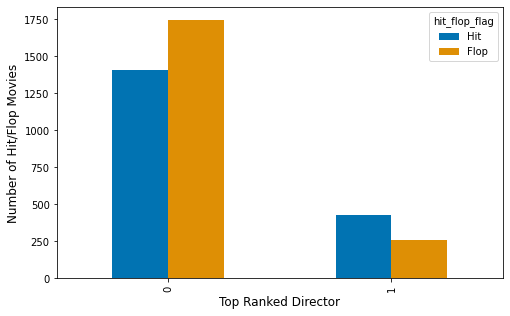

In [ ]:
#19. Compare hit and flop movies by top ranked director
df_rt_bx_stackbar = df_rt_bx.groupby(['pop_director', 'hit_flop_flag'])['pop_director'].count().unstack('hit_flop_flag').fillna(0)
df_rt_bx_stackbar[['Hit','Flop']].plot(kind='bar', stacked=False, figsize=(8,5));
plt.ylabel("Number of Hit/Flop Movies", size=12)
plt.xlabel("Top Ranked Director", size=12);

This bar chart shows that movies with a top ranked director are more likely to be a hit movie than a flop movie. This is expected as a top ranked director has a better understanding of how to guide the vision of a movie to appeal to a wide audience.

### **4.2.9 Compare hit and flop movies by the number of movie stars**

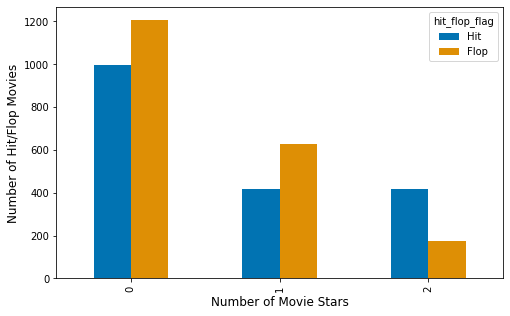

In [ ]:
#20. Compare hit and flop movies by number of movie stars
df_rt_bx_stackbar = df_rt_bx.groupby(['pop_actor', 'hit_flop_flag'])['pop_actor'].count().unstack('hit_flop_flag').fillna(0)
df_rt_bx_stackbar[['Hit','Flop']].plot(kind='bar', stacked=False, figsize=(8,5));
plt.ylabel("Number of Hit/Flop Movies", size=12)
plt.xlabel("Number of Movie Stars", size=12);

This bar chart shows that movies with 2 movie stars are more likely to be a hit movie than a flop movie. This is not the case for movies with 1 movie star.

### **4.2.10 Compare hit and flop movies by tomatometer score**

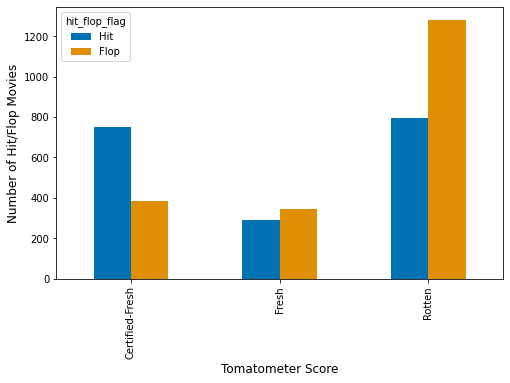

In [ ]:
#21. Compare hit and flop movies by tomatometer score
df_rt_bx_stackbar = df_rt_bx.groupby(['tomatometer_status', 'hit_flop_flag'])['tomatometer_status'].count().unstack('hit_flop_flag').fillna(0)
df_rt_bx_stackbar[['Hit','Flop']].plot(kind='bar', stacked=False, figsize=(8,5));
plt.ylabel("Number of Hit/Flop Movies", size=12)
plt.xlabel("Tomatometer Score", size=12);

This bar chart shows that movies with a certified-fresh tomatometer score are more likely to be a hit movie than a flop movie. This is expected as movies with a certified-fresh tomatometer score have global appeal and are, thus, likely to do extremely well financially in which revenue can outgrow cost by a significant margin.

### **4.2.11 Compare hit and flop movies by audience score**

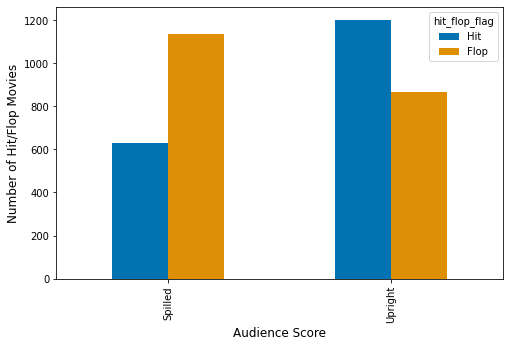

In [ ]:
#22. Compare hit/flop movies by audience score
df_rt_bx_stackbar = df_rt_bx.groupby(['audience_status', 'hit_flop_flag'])['audience_status'].count().unstack('hit_flop_flag').fillna(0)
df_rt_bx_stackbar[['Hit','Flop']].plot(kind='bar', stacked=False, figsize=(8,5));
plt.ylabel("Number of Hit/Flop Movies", size=12)
plt.xlabel("Audience Score", size=12);

This bar chart shows that movies with an upright audience score are more likely to be a hit movie than a flop movie. This is expected as movies with an upright audience score have global appeal and are, thus, likely to do extremely well financially in which revenue can outgrow cost by a significant margin.

### **4.2.12 Compare hit and flop movies by audience count**

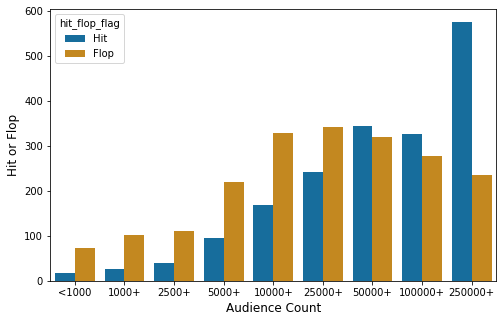

In [ ]:
#23. Compare hit and flop movies by audience count
df_rt_bx_stackbar = df_rt_bx.groupby(['g_audience_count', 'hit_flop_flag']).agg({"hit_flop_flag":"count"})
#df_rt_bx_stackbar[['Hit','Flop']].plot(kind='bar', stacked=True)
df_rt_bx_stackbar.rename(columns={"hit_flop_flag":"count"}, inplace=True)
df_rt_bx_stackbar.reset_index(inplace=True)
plt.figure(figsize=(8, 5))
sns.barplot(x="g_audience_count", y="count", hue="hit_flop_flag", order=["<1000","1000+","2500+","5000+","10000+","25000+","50000+","100000+","250000+"], hue_order=["Hit", "Flop"], data=df_rt_bx_stackbar)
plt.ylabel("Hit or Flop", size=12)
plt.xlabel("Audience Count", size=12);
#plt.legend(title='Hit or Flop', loc='upper left', labels=['Hit', 'Flop']);

This bar chart shows that movies with more than 50,000 audience count are more likely to be a hit movie than a flop movie. A movie's financial success and general audience consensus about the quality of a movie are consistent.

### **4.2.13 Compare hit and flop movies for content rating**

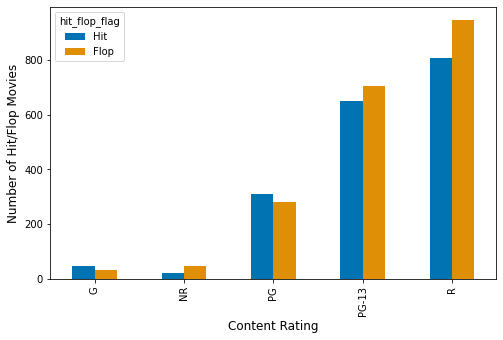

In [ ]:
#24. Compare hit/flop movies and content rating
df_rt_bx_stackbar = df_rt_bx.groupby(['g_content_rating', 'hit_flop_flag'])['g_content_rating'].count().unstack('hit_flop_flag').fillna(0)
df_rt_bx_stackbar[['Hit','Flop']].plot(kind='bar', stacked=False, figsize=(8,5));
plt.ylabel("Number of Hit/Flop Movies", size=12)
plt.xlabel("Content Rating", size=12);#

This bar chart shows that G and PG movies are more likely to be a hit movie than a flop movie. 

## **4.3 Exploratory analysis - compare tomatometer score and audience score**

Rotten Tomatoes offered film and television reviews since 1998. The website displays two separate average ratings (on a percentage scale) for each movie depicting the share of reviews it received that were positive: one based on the reviews from a selection of critics and another generated by the site’s users.

But does the opinion of the esteemed movie critic represent that of the casual cinema goer? Or should we rely on the audience’s rating to influence our choice of entertainment?

The analysis below will show you the similarities and differences between the movie rating behavior of film critics and audience members.

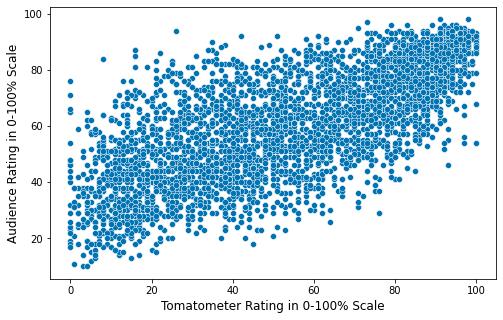

In [ ]:
#25.1. Correlation between tomatometer and audience rating
plt.figure(figsize=(8, 5))
sns.scatterplot(x="tomatometer_rating", y="audience_rating", data=df_rt_bx)
plt.xlabel("Tomatometer Rating in 0-100% Scale", size=12)
plt.ylabel("Audience Rating in 0-100% Scale", size=12);

In [ ]:
print ("correlation: %.2f" % df_rt_bx['tomatometer_rating'].corr(df_rt_bx['audience_rating']).round(2))

correlation: 0.71


The above scatter plot indicates that there is some evidence of a positive correlation between tomatometer and audience ratings, suggesting that a movie rated highly by audience will also receive a positive rating from critics.
But the correlation displayed in the plot is not strong, with a large number of movies falling a considerable distance away from the central line.

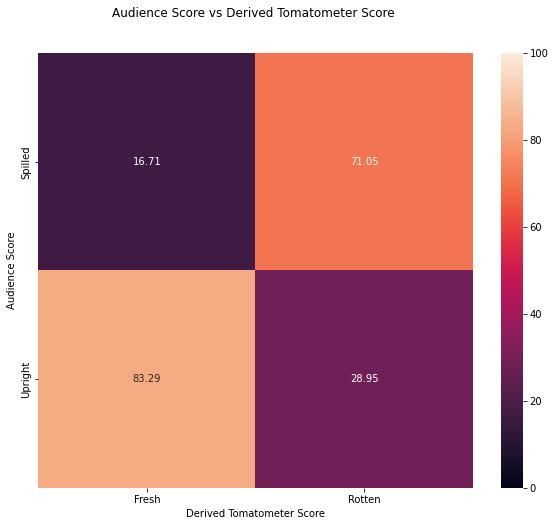

In [ ]:
#25.2 Compare tomatometer score and audience score
df_rt_bx_gr = df_rt_bx.groupby(['g_tomatometer_status', 'audience_status']).agg({'audience_status': 'count'})
df_rt_bx_pcts = df_rt_bx_gr.groupby(level=0).apply(lambda x:
                                                 100 * x / float(x.sum()))
df_rt_bx_pcts.rename(columns={"audience_status":"count"}, inplace=True)
df_rt_bx_pcts.reset_index(inplace=True)
df_rt_bx_pcts=df_rt_bx_pcts.pivot(index='audience_status', columns='g_tomatometer_status', values='count')
fig = plt.figure(figsize=(10, 8))
plt.clf()
ax = fig.add_subplot(111)
ax.set_aspect(1)
res = sns.heatmap(df_rt_bx_pcts, annot=True, vmin=0.0, vmax=100.0, fmt='.2f')

plt.yticks([0.5,1.5], ['Spilled', 'Upright'],va='center')
plt.xlabel('Derived Tomatometer Score')
plt.ylabel('Audience Score')
plt.title('''Audience Score vs Derived Tomatometer Score \n\n''');

This heatmap shows a ~17% disagreement on "good" movies and a ~29% disagreement on "bad" movies. So for "bad" movies, audience and critics are more likely to disagree. Why is there such a large disconnect between critics and audience reviews? I think it is because critics evaluate the quality of a film whereas audience usually evaluates enjoyability. 

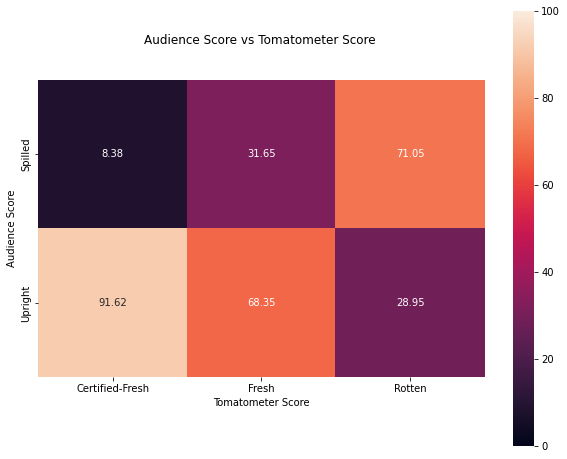

In [ ]:
df_rt_bx_gr = df_rt_bx.groupby(['tomatometer_status', 'audience_status']).agg({'audience_status': 'count'})
df_rt_bx_pcts = df_rt_bx_gr.groupby(level=0).apply(lambda x:
                                                 100 * x / float(x.sum()))
df_rt_bx_pcts.rename(columns={"audience_status":"count"}, inplace=True)
df_rt_bx_pcts.reset_index(inplace=True)
df_rt_bx_pcts=df_rt_bx_pcts.pivot(index='audience_status', columns='tomatometer_status', values='count')
fig = plt.figure(figsize=(10, 8))
plt.clf()
ax = fig.add_subplot(111)
ax.set_aspect(1)
res = sns.heatmap(df_rt_bx_pcts, annot=True, vmin=0.0, vmax=100.0, fmt='.2f')
plt.yticks([0.5,1.5], ['Spilled', 'Upright'],va='center')
plt.xlabel('Tomatometer Score')
plt.ylabel('Audience Score')
plt.title('''Audience Score vs Tomatometer Score \n\n''');

I reran the analysis used original tomatometer score where Certified-Fresh and Fresh are separated. This heatmap shows that for movies with a critic rating of certified-fresh (very good movies), the audience is more likely to agree with critics' review at ~92% agreement, which is higher than what we see in the previous plot at ~83% agreement where Certified-Fresh and Fresh are grouped together. On the contrary, this heatmap shows a bigger disagreement in the Fresh group at ~32% disagreement compared to the ~17% disagreement from previous plot. 

The heatmap suggests that a certified-fresh movie tends to be approved by both critics and audience. 

In [ ]:
df_rt_bx_review=df_rt_bx[(df_rt_bx['w_gross']>100000000)]
df_rt_bx_review['rating_diff']=df_rt_bx_review['tomatometer_rating']-df_rt_bx_review['audience_rating']
df_rt_bx_review=df_rt_bx_review[['movie_title','content_rating','main_genre','pop_director','pop_actor','runtime','w_gross','hit_flop_flag','tomatometer_rating','audience_rating','rating_diff']]
df_rt_bx_review.sort_values(by='rating_diff',inplace=True)
df_rt_bx_review.head(10)

,movie_title,content_rating,main_genre,pop_director,pop_actor,runtime,w_gross,hit_flop_flag,tomatometer_rating,audience_rating,rating_diff
3045,Step Up,PG-13,Drama,0,0,98.0,110989157.0,Hit,21.0,83.0,-62.0
3617,Underworld: Evolution,R,Action & Adventure,0,0,105.0,113417762.0,Hit,17.0,72.0,-55.0
692,Bad Boys II,R,Action & Adventure,1,2,146.0,273271982.0,Flop,23.0,78.0,-55.0
358,Big Momma's House 2,PG-13,Comedy,0,0,99.0,137047376.0,Hit,5.0,58.0,-53.0
3660,Venom,PG-13,Action & Adventure,1,2,112.0,853530899.0,Hit,30.0,81.0,-51.0
2169,Man on Fire,R,Action & Adventure,1,1,145.0,130968579.0,Flop,38.0,89.0,-51.0
983,Cheaper by the Dozen 2,PG,Comedy,1,2,94.0,135015330.0,Flop,6.0,57.0,-51.0
1602,Grown Ups,PG-13,Comedy,0,0,102.0,272223000.0,Hit,11.0,62.0,-51.0
2523,Patch Adams,PG-13,Comedy,0,1,115.0,202173000.0,Hit,22.0,73.0,-51.0
817,Blended,PG-13,Comedy,0,0,117.0,127990741.0,Hit,14.0,64.0,-50.0


In [ ]:
df_rt_bx_review.sort_values(by='rating_diff',ascending=False,inplace=True)
df_rt_bx_review.head(10)

,movie_title,content_rating,main_genre,pop_director,pop_actor,runtime,w_gross,hit_flop_flag,tomatometer_rating,audience_rating,rating_diff
3021,Spy Kids,PG,Action & Adventure,0,2,88.0,197692062.0,Hit,93.0,46.0,47.0
639,Antz,PG,Animation,0,0,87.0,152457863.0,Hit,92.0,52.0,40.0
3076,Stuart Little 2,PG,Action & Adventure,0,2,78.0,166000000.0,Flop,81.0,41.0,40.0
513,About a Boy,PG-13,Comedy,1,1,100.0,130759651.0,Hit,93.0,55.0,38.0
3022,Spy Kids 2: The Island of Lost Dreams,PG,Action & Adventure,0,2,99.0,119721296.0,Hit,75.0,39.0,36.0
2410,Noah,PG-13,Classics,0,2,137.0,352831065.0,Hit,76.0,41.0,35.0
3639,Us,R,Horror,0,2,116.0,256091919.0,Hit,93.0,59.0,34.0
1962,King Kong,PG-13,Action & Adventure,1,2,187.0,550517357.0,Hit,84.0,50.0,34.0
3698,War of the Worlds,PG-13,Action & Adventure,1,2,116.0,606836535.0,Hit,75.0,42.0,33.0
1764,Hulk,PG-13,Action & Adventure,1,1,138.0,245031679.0,Flop,62.0,29.0,33.0


To take a closer look at the kinds of movies that had the biggest disagreement between audience and critic reviews, I sorted the movies by difference between audience and critic rating. I first found that the 10 highest disagreed-upon movies in which audience rating is higher than critic rating and then found the 10 highest disagreed-upon movies in which critic rating is higher than audience rating. 

In the first table in which audience rating is higher, the movies are mostly either PG-13 or R. This signals a difference in criteria upon which audience and critics used to evaluate the movies. 

In the second table in which critic rating is higher, there are a lot more PG movies. The target audience of PG movies are typically children. However, the audience reviewers are typically parents who accompany their children rather than the children themselves. This helps explain why audience ratings are typically much lower than critic ratings since critics are reviewing movies based on quality whereas the audience is rating movies based on enjoyability. Parents who accompanied their children to see PG movies may not have enjoyed the movie as much as their children as they are not the target demographic for the movie, and, thus, gave a low rating for the movie.

## **4.4 Multivariate linear regression**

### **4.4.1 Model building**

I will be building a multivariate linear regression model to predict worldwide box office revenue. In this model, I will include predictor budget, popular director, the number of movie stars, grouped tomatometer rating, grouped audience rating, grouped audience count, regrouped content rating, regrouped genres, movie release months, and derived runtime groups. For tomatometer rating, audience rating, audience count, and the number of movie stars, I  kept using the original categorical variables in numerical value. For other categorical variables i.e. content rating, genres, release months and runtime, I created dummy variables and used the category with the most records as reference.

In [ ]:
df_rt_bx_dummy=pd.get_dummies(df_rt_bx, columns=["g_content_rating", "g_genre", "releaseMonth", "g_runtime"])

In [ ]:
X = df_rt_bx_dummy[['budget', 'pop_director','pop_actor','g_tomatometer_rating', 'g_audience_rating', 'g_audience_count_n', 'g_content_rating_G', 
                    'g_content_rating_PG', 'g_content_rating_PG-13', 'g_content_rating_NR', 'g_genre_Animation', 'g_genre_Comedy', 
                    'g_genre_Drama', 'g_genre_Horror', 'g_genre_Mystery & Suspense', 'g_genre_Other','releaseMonth_1', 'releaseMonth_2',
                    'releaseMonth_3','releaseMonth_4','releaseMonth_5','releaseMonth_6','releaseMonth_7','releaseMonth_8','releaseMonth_9',
                    'releaseMonth_10','releaseMonth_11', 'g_runtime_1.0', 'g_runtime_3.0'
              ]]
y = df_rt_bx_dummy['w_gross']
 
# with sklearn
regr = linear_model.LinearRegression()
regr.fit(X, y)

print('\nIntercept: \n', round(regr.intercept_,3), "\n")

print ("Predictor                      Coefficient")
features=list(X)
for i in range(0,len(features)):
  print('{:30s}'.format(features[i]), '{:14.3f}'.format(regr.coef_[i]))


Intercept: 
 -167497933.451 

Predictor                      Coefficient
budget                                  2.313
pop_director                     46272825.212
pop_actor                        41844132.007
g_tomatometer_rating              4500789.824
g_audience_rating                11800444.804
g_audience_count_n                3643130.637
g_content_rating_G               24243631.681
g_content_rating_PG              24274647.873
g_content_rating_PG-13           16631387.526
g_content_rating_NR               9940982.987
g_genre_Animation                67998276.414
g_genre_Comedy                    3492878.174
g_genre_Drama                    -9528227.597
g_genre_Horror                   58225878.869
g_genre_Mystery & Suspense       21407812.551
g_genre_Other                    -8986549.751
releaseMonth_1                   20358585.922
releaseMonth_2                   14624479.293
releaseMonth_3                   13828897.530
releaseMonth_4                    5612572.197
releas

### **4.4.2 Evaluation of Significance**

I will use permutation tests to calculate p values for each predictor and bootstrap resampling to calculate coefficients' confidence interval.

**Permutation tests -> p values**

The null hypothesis no relationship between predictors and world box office.

In [ ]:
np.random.seed(2950)
def permute(input_array):
    # shuffle is inplace, so copy to preserve input
    permuted = input_array.copy().values #convert to numpy array, avoiding warning
    np.random.shuffle(permuted)
    return pd.Series(permuted) # convert back to pandas
#permute(y)

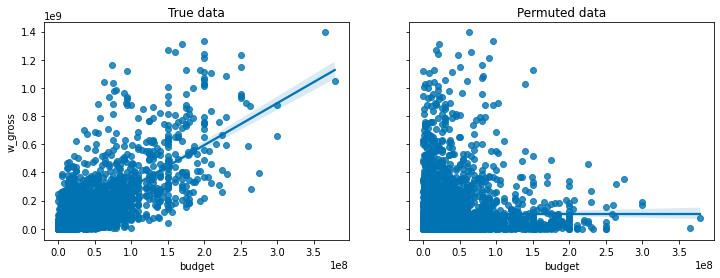

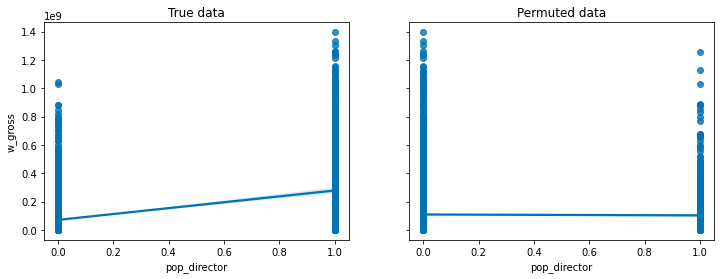

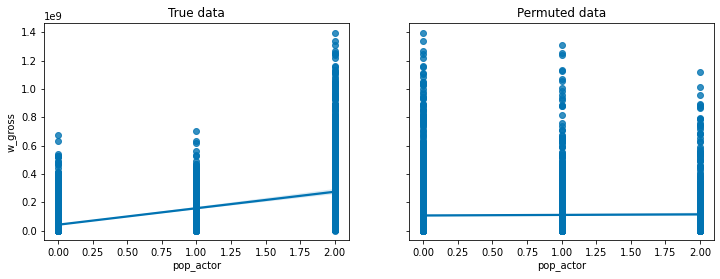

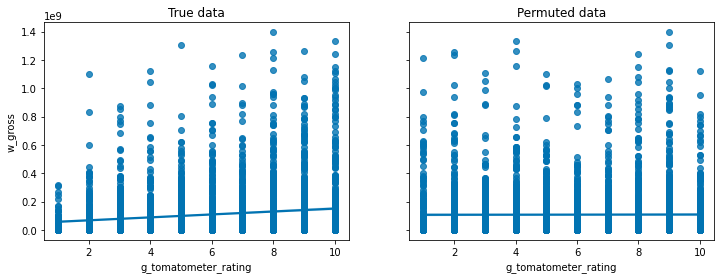

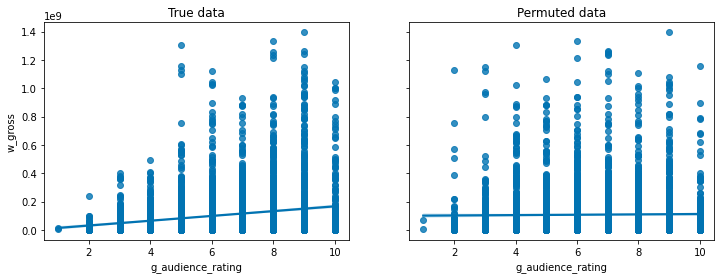

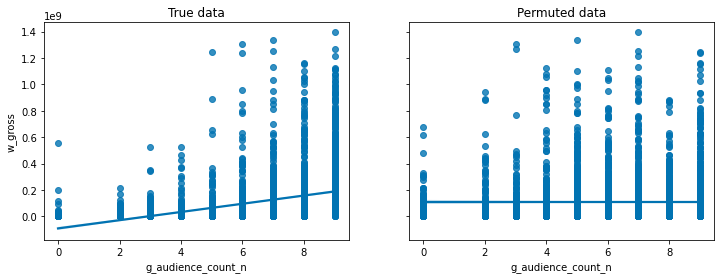

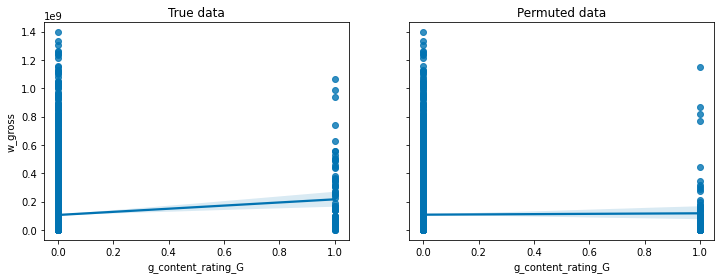

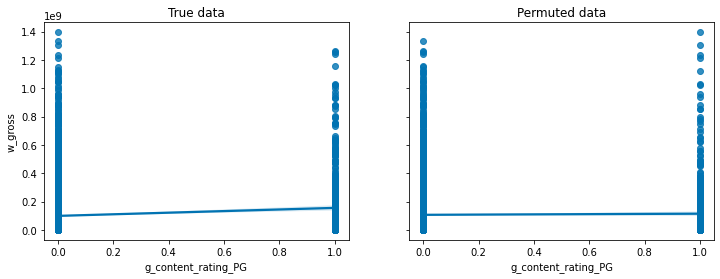

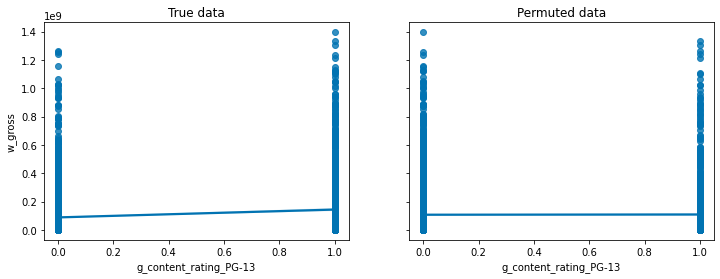

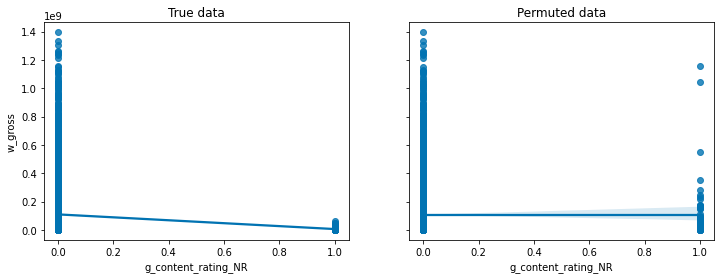

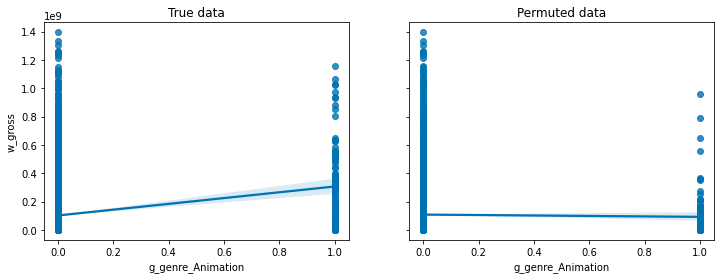

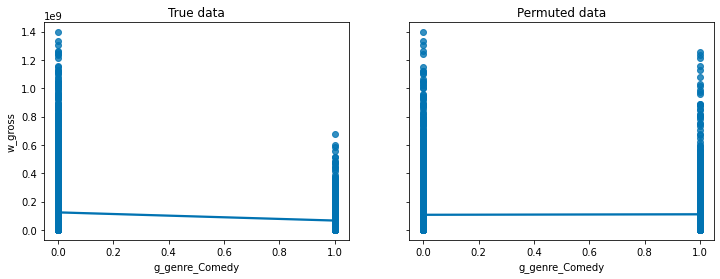

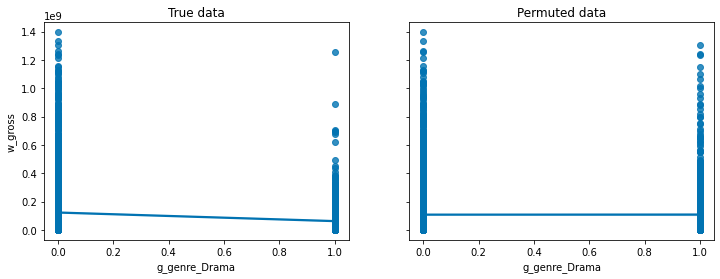

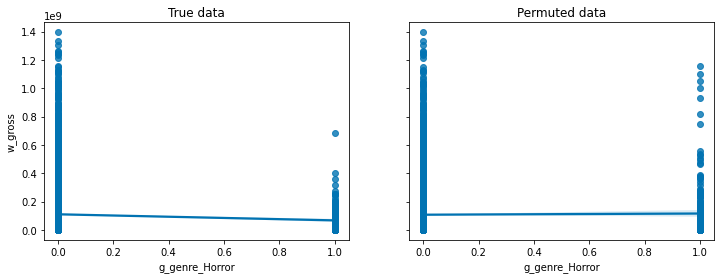

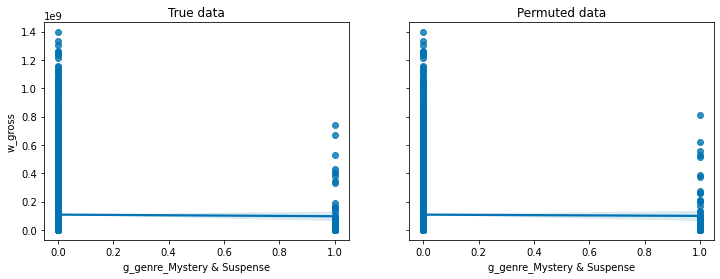

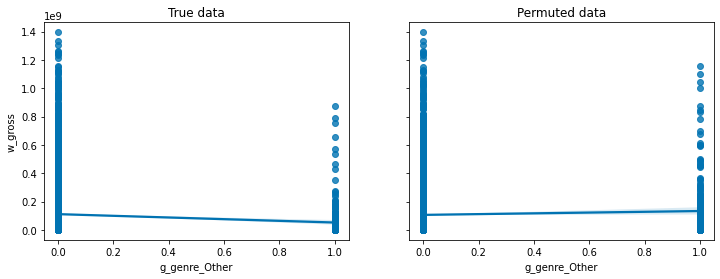

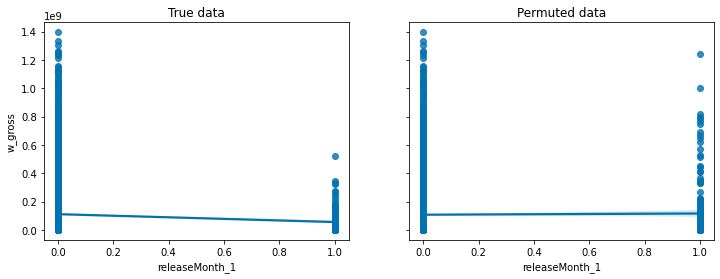

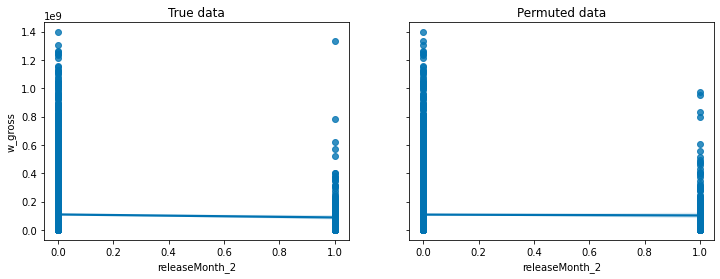

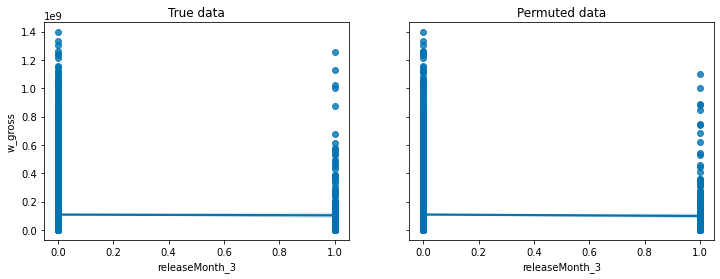

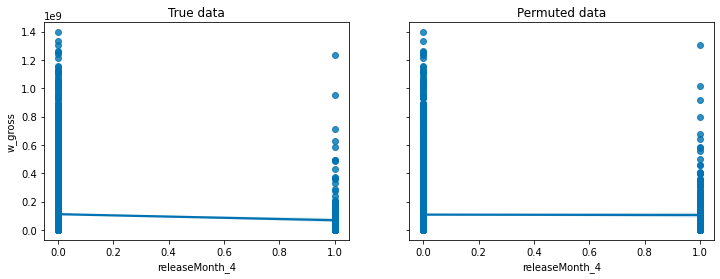

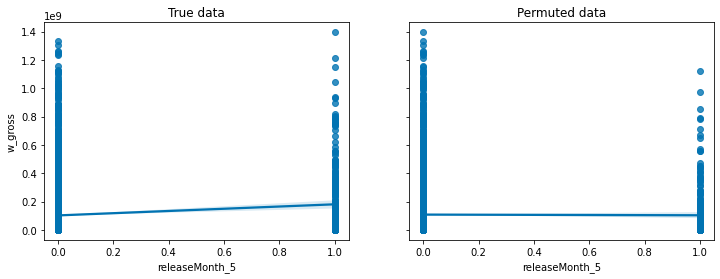

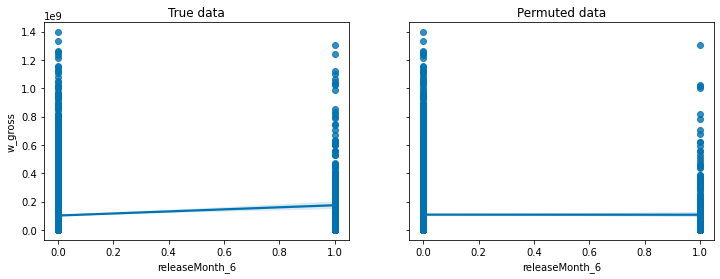

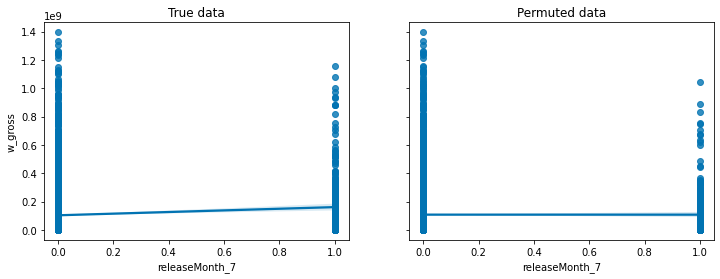

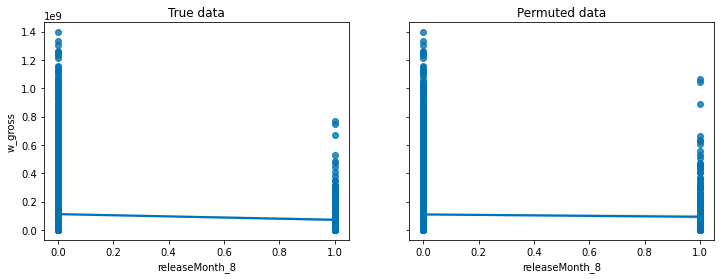

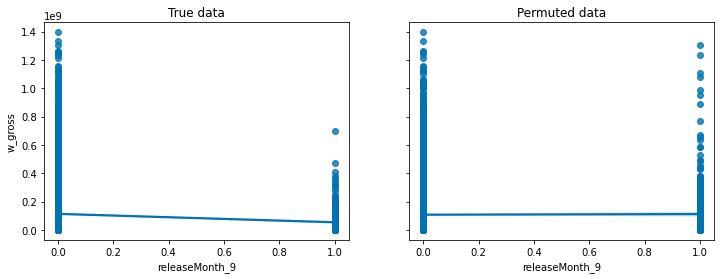

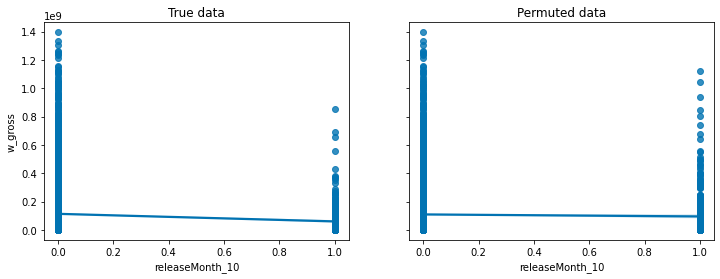

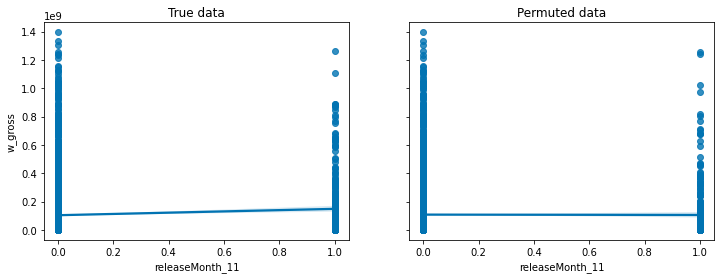

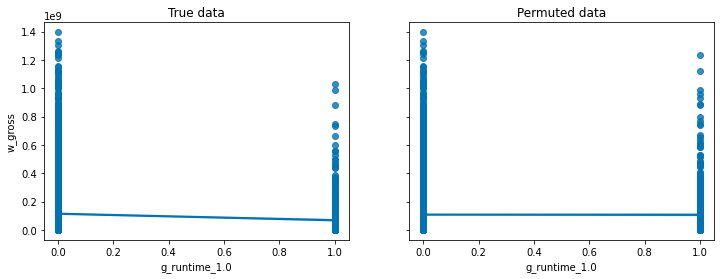

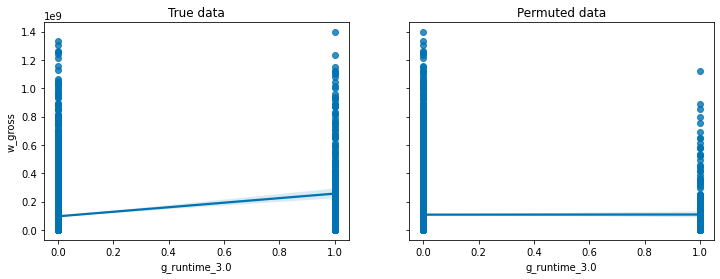

In [ ]:
#fig.tight_layout(pad=3, h_pad=5)

for index, column_name in enumerate(X):
  fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12,4), sharey=True)
  sns.regplot(x=X[X.columns[index]], y=y, ax=ax1)
  ax1.set_title('True data')
  sns.regplot(x=X[X.columns[index]], y=permute(y), ax=ax2)
  ax2.set_title('Permuted data')
  plt.show()

The plots indicate there's no relationship between box office and permuted predictors because we shuffled the predictors randomly, breaking any possible connection to box office.

In [ ]:
# how many permuted (null hypothesis) slopes are absolutely greater than our observed slope?
# this will give us a p value
n_permutations = 500
permuted_slopes = np.zeros(n_permutations)

for index, column_name in enumerate(X):
  steeper_slopes = 0
  for i in range(n_permutations):
    permuted_model = LinearRegression().fit(X, permute(y))
    
    permuted_slopes[i] = permuted_model.coef_[index]
    
    if np.abs(permuted_model.coef_[index]) > np.abs(regr.coef_[index]):
        steeper_slopes += 1
    
  print(f'p-value for coefficient {column_name}: {steeper_slopes / n_permutations}')

p-value for coefficient budget: 0.0
p-value for coefficient pop_director: 0.0
p-value for coefficient pop_actor: 0.0
p-value for coefficient g_tomatometer_rating: 0.002
p-value for coefficient g_audience_rating: 0.0
p-value for coefficient g_audience_count_n: 0.01
p-value for coefficient g_content_rating_G: 0.248
p-value for coefficient g_content_rating_PG: 0.006
p-value for coefficient g_content_rating_PG-13: 0.014
p-value for coefficient g_content_rating_NR: 0.63
p-value for coefficient g_genre_Animation: 0.002
p-value for coefficient g_genre_Comedy: 0.692
p-value for coefficient g_genre_Drama: 0.27
p-value for coefficient g_genre_Horror: 0.0
p-value for coefficient g_genre_Mystery & Suspense: 0.268
p-value for coefficient g_genre_Other: 0.514
p-value for coefficient releaseMonth_1: 0.176
p-value for coefficient releaseMonth_2: 0.244
p-value for coefficient releaseMonth_3: 0.3
p-value for coefficient releaseMonth_4: 0.7
p-value for coefficient releaseMonth_5: 0.006
p-value for coeffi

Using permutation test, if p-value is less than 0.05, I reject null hypothesis that predictor's coefficient is 0. Predictor buget, pop_director, pop_actor, g_tomatometer_rating, g_audience_rating, g_audience_count, g_content_rating_PG, g_content_rating_PG-13, g_genre_Animation, g_genre_Horror, releaseMonth_5, releaseMonth_6, releaseMonth_7 are statistically significant.

**Bootstrap resampling -> confidence intervals**

In [ ]:
np.random.seed(2950)
# use bootstrap to estimate 95% confidence interval
# run a whole lot of bootstraps
n_bootstrap = 500
bootstrap_slopes = np.zeros(n_bootstrap)

for index, column_name in enumerate(X):
  for i in range(n_bootstrap):
    resampled_data = df_rt_bx_dummy.sample(n=len(X), replace=True)
    resampled_X = resampled_data[['budget', 'pop_director','pop_actor','g_tomatometer_rating', 'g_audience_rating', 'g_audience_count_n', 'g_content_rating_G', 
                    'g_content_rating_PG', 'g_content_rating_PG-13', 'g_content_rating_NR', 'g_genre_Animation', 'g_genre_Comedy', 
                    'g_genre_Drama', 'g_genre_Horror', 'g_genre_Mystery & Suspense', 'g_genre_Other','releaseMonth_1', 'releaseMonth_2',
                    'releaseMonth_3','releaseMonth_4','releaseMonth_5','releaseMonth_6','releaseMonth_7','releaseMonth_8','releaseMonth_9',
                    'releaseMonth_10','releaseMonth_11', 'g_runtime_1.0', 'g_runtime_3.0'
              ]]
    resampled_y = resampled_data['w_gross']
    resampled_model = LinearRegression().fit(resampled_X, resampled_y)
    
    bootstrap_slopes[i] = resampled_model.coef_[index]

# get largest 2.5% and smallest 2.5% of modeled slopes
  print(f'Observed coefficient for {column_name}: {round(regr.coef_[index], 3)}')
  print(f'Bootstrapped CI: {np.quantile(bootstrap_slopes, q=[0.025, 0.975])}')

Observed coefficient for budget: 2.313
Bootstrapped CI: [2.13094136 2.5068044 ]
Observed coefficient for pop_director: 46272825.212
Bootstrapped CI: [32271251.68363845 58092626.97969779]
Observed coefficient for pop_actor: 41844132.007
Bootstrapped CI: [35731160.70711442 48308653.99495669]
Observed coefficient for g_tomatometer_rating: 4500789.824
Bootstrapped CI: [3121144.9254848  6004844.07405892]
Observed coefficient for g_audience_rating: 11800444.804
Bootstrapped CI: [ 9508888.03818346 14048761.60796077]
Observed coefficient for g_audience_count_n: 3643130.637
Bootstrapped CI: [1995009.72521132 5308616.99963906]
Observed coefficient for g_content_rating_G: 24243631.681
Bootstrapped CI: [-6648302.95771707 54283872.3994549 ]
Observed coefficient for g_content_rating_PG: 24274647.873
Bootstrapped CI: [13757742.28484515 34393637.61944614]
Observed coefficient for g_content_rating_PG-13: 16631387.526
Bootstrapped CI: [ 9766043.54741413 23971115.53144772]
Observed coefficient for g_cont

### **4.4.3 Model evaluation**

There are 3 main metrics for model evaluation in regression:
1. R Square/Adjusted R Square
2. Mean Square Error(MSE)/Root Mean Square Error(RMSE)
3. Mean Absolute Error(MAE)

**R Square/Adjusted R Square**

R Square measures how much variability in dependent variable can be explained by the model. It is the square of the Correlation Coefficient(R) and that is why it is called R Square.

R Square is calculated by the sum of squared of prediction error divided by the total sum of the square which replaces the calculated prediction with mean. R Square value is between 0 to 1 and a bigger value indicates a better fit between prediction and actual value.

R Square is a good measure to determine how well the model fits the dependent variables. However, it does not take into consideration of overfitting problem. If your regression model has many independent variables, because the model is too complicated, it may fit very well to the training data but performs badly for testing data. That is why Adjusted R Square is introduced because it will penalize additional independent variables added to the model and adjust the metric to prevent overfitting issues.

In [ ]:
#calculate R**2 and ajusted R**2
print('R**2: \n', round(regr.score(X,y),3))
adjr2=1 - (1-regr.score(X, y))*(len(y)-1)/(len(y)-X.shape[1]-1)
print('Adjusted R**2: \n', round(adjr2,3))

R**2: 
 0.654
Adjusted R**2: 
 0.652


The model has R<sup>2</sup> of 0.654 and adjusted R<sup>2</sup> of 0.652

**Mean Square Error(MSE)/Root Mean Square Error(RMSE)**

While R Square is a relative measure of how well the model fits dependent variables, Mean Square Error is an absolute measure of the goodness for the fit.

Root Mean Square Error(RMSE) is the square root of MSE. It is used more commonly than MSE because firstly sometimes MSE value can be too big to compare easily. Secondly, MSE is calculated by the square of error, and thus square root brings it back to the same level of prediction error and makes it easier for interpretation.

In [ ]:
#calculate RSME
from sklearn.metrics import mean_squared_error
import math
print('MSE: ', mean_squared_error(y, regr.predict(X)))
print('RMSE:', round(math.sqrt(mean_squared_error(y, regr.predict(X))),3))

MSE:  1.0339641875929936e+16
RMSE: 101684029.601


This model's MSE is 1.034e+16 and RMSE is 1.02e+8.

**Mean Absolute Error(MAE)**

Mean Absolute Error(MAE) is similar to Mean Square Error(MSE). However, instead of the sum of square of error in MSE, MAE is taking the sum of the absolute value of error.

Compare to MSE or RMSE, MAE is a more direct representation of sum of error terms. MSE gives larger penalization to big prediction error by square it while MAE treats all errors the same.

In [ ]:
from sklearn.metrics import mean_absolute_error
print('MAE:', round(mean_absolute_error(y, regr.predict(X)),3))

MAE: 64871267.818


The model's MAE is 6.5e+7.

**Testing the assumptions of linear regression**

There are four principal assumptions which justify the use of linear regression models for purposes of inference or prediction:

(i) linearity and additivity of the relationship between dependent and independent variables:

(ii) statistical independence of the errors

(iii) homoscedasticity (constant variance) of the errors

    (a) versus the predictions

    (b) versus any independent variable

(iv) normality of the error distribution

**Evaluating model linearity of predictive relationships**

<Figure size 576x360 with 0 Axes>

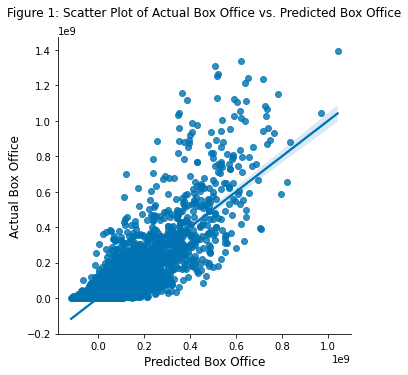

In [ ]:
modelcheck = pd.concat([pd.DataFrame(regr.predict(X)),df_rt_bx_dummy['w_gross']], axis = 1)
modelcheck.rename(columns={modelcheck.columns[0]:'predicted'}, inplace=True)
plt.figure(figsize=(8, 5))
sns.lmplot(x='predicted', y='w_gross', data=modelcheck, x_jitter=.05)
plt.xlabel("Predicted Box Office", size=12)
plt.ylabel("Actual Box Office", size=12)
plt.title ("Figure 1: Scatter Plot of Actual Box Office vs. Predicted Box Office\n")
plt.show()

The predicted vs. actual plot shows good linearity.

**Evaluating statistical independence of the errors**

In [ ]:
#calcualte residual
residual = (y - regr.predict(X))
abs_residual=abs(residual)

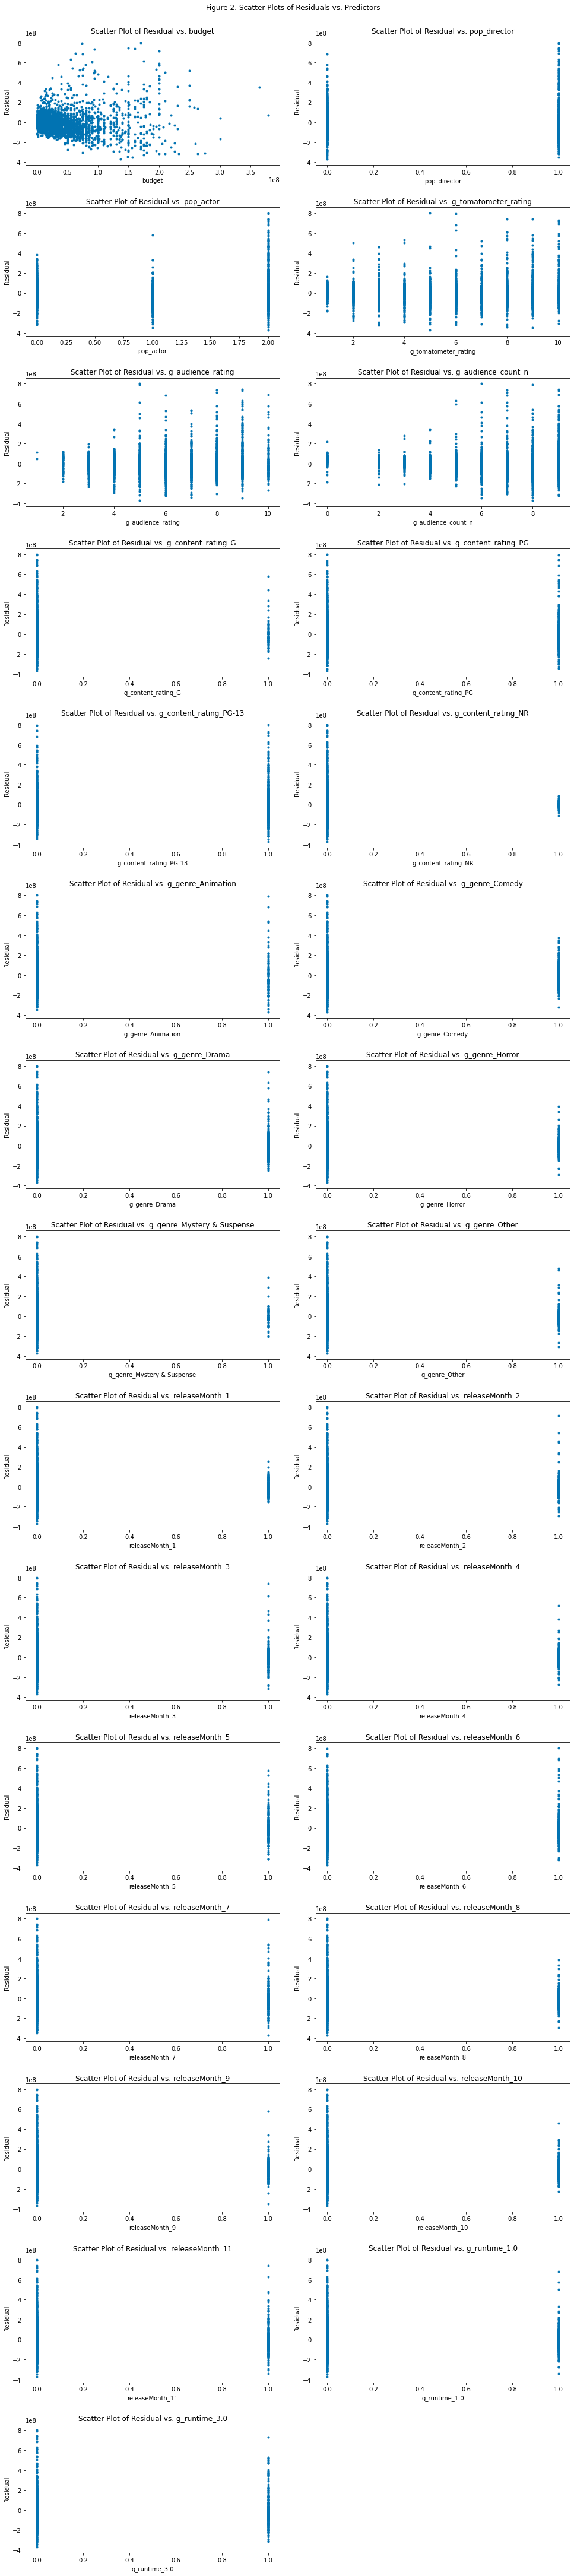

In [ ]:
f, ax = plt.subplots(nrows=15, ncols=2, figsize=(14,60))
f.delaxes(ax[14,1])
f.tight_layout(pad=3, h_pad=5)

# scatter plots of residual vs each predictor
for index, column_name in enumerate(X):
  rowindex = index//2
  colindex = 0 if index%2==0 else 1
  ax[rowindex][colindex].scatter(df_rt_bx_dummy[f"{column_name}"],residual, marker=".")
  ax[rowindex][colindex].set_title(f"Scatter Plot of Residual vs. {column_name}")
  ax[rowindex][colindex].set_ylabel("Residual")
  ax[rowindex][colindex].set_xlabel(f"{column_name}")
  f.suptitle('Figure 2: Scatter Plots of Residuals vs. Predictors', y=1.005)
plt.show()

In all residual by predictor plots, the residuals are randomly scattered with no obvious non-random pattern, indicating there is no correlation between residuals no matter how the rows are sorted.

**Evaluating model homoscedasticity (constant variance) of the errors**

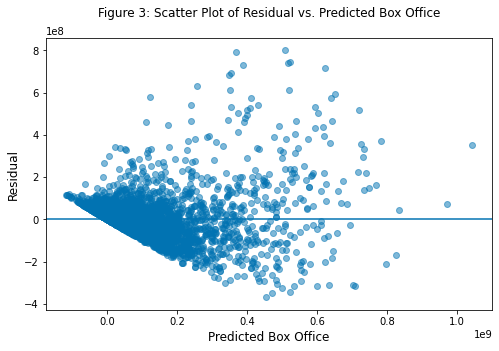

In [ ]:
plt.figure(figsize=(8, 5))
plt.scatter(regr.predict(X), residual, alpha=0.5)
y_lim = plt.ylim()
x_lim = plt.xlim()
plt.plot(x_lim, [0,0])
plt.ylim(y_lim)
plt.xlim(x_lim)
plt.xlabel("Predicted Box Office", size=12)
plt.ylabel("Residual", size=12);
plt.title ("Figure 3: Scatter Plot of Residual vs. Predicted Box Office\n")
plt.show()

In the residual by predicted box office plot, the residuals are randomly scattered around the center line of zero, with no obvious non-random pattern, indicating overall heteroscedasticity is not observed.

Plots in figure 2 also indicate that there is no heteroscedasticity in the model. 

 **Evaluating normality of the error distribution**

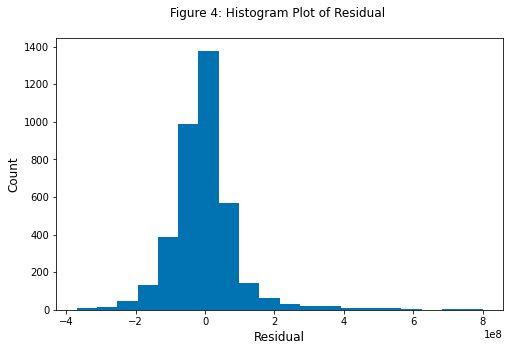

In [ ]:
plt.figure(figsize=(8, 5))
plt.hist(residual, bins=20)
plt.ylabel("Count", size=12)
plt.xlabel("Residual", size=12);
plt.title ("Figure 4: Histogram Plot of Residual \n")
plt.show()

Histogram plot shows residual roughly normally distributed. 

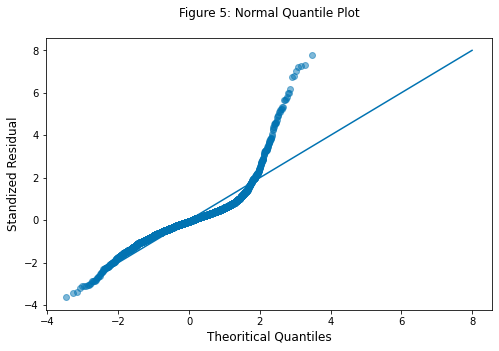

In [ ]:
from scipy.special import ndtri

df_residual=pd.DataFrame(residual)
df_residual.rename(columns={df_residual.columns[0]:'residual'}, inplace=True)
df_residual.sort_values(by='residual', ascending=True, inplace=True)
df_residual.reset_index(inplace=True)
df_residual['count']=df_residual.index+1
n_rows=df_residual.shape[0]
df_residual['percentile_area']=(df_residual['count'])/n_rows
df_residual['z_theoritical']=ndtri(df_residual['percentile_area'])
df_residual['z_actual']=(df_residual['residual']-df_residual['residual'].mean())/df_residual['residual'].std(ddof=0)

plt.figure(figsize=(8, 5))
plt.scatter(df_residual['z_theoritical'], df_residual['z_actual'], alpha=0.5)
plt.plot([-2, 0, 4, 8], [-2, 0, 4, 8])
plt.xlabel("Theoritical Quantiles", size=12)
plt.ylabel("Standized Residual", size=12);
plt.title ("Figure 5: Normal Quantile Plot\n")
plt.show()

The normal quantile plot of the residuals shows pretty good alignment to the line with small number of points at the top slightly offset. Probably not significant and a reasonable alignment. It can believe that the errors are normally distributed.

Based on analyses above, the model meets all four assumptions of linear regression. The model can be used for prediction of box office.

### **4.4.4 Model interpretation**

Some key findings from the multivariate linear regression model include:

* Echoing the positive correlation between worldwide box office and budget, a higher budget leads to a higher box office. For each \\$1 million increase in budget, a movie studio can expect to receive an additional \\$2.3 million dollars in box office revenue.

* A famous director has an important effect on box office revenue as a director is in charge of the creative direction a movie takes. Hiring a famous director yields \\$46 million more in box office revenue than not hiring a famous director.

* The presence of a movie star in a movie can increase box office revenue as they help bring hype and attention to a movie. Hiring one movie star can bring \\$42 million more in box office revenue and hiring two movie stars can bring \\$84 million more in box office revenue.

* The content rating of a movie affects box office as each content rating has varying target audiences. Because of larger target audience, G, PG, and PG-13 movies helps a movie studio gain tens of millions of dollars more in box office revenue compared to R-rated movies. 

* The genre of a movie affects box office as different genres appeal to different preferences. Animation and horror movies are likely to receive a higher box office than action & adventure movies and are the only two genres that have a statistically significant impact on box office.

* Aside from factors that contribute to the production of a movie, timing also matters when predicting box office. The best months to release a movie to have a large box office are May, June, or July.

* Reviews come after a movie is released, however, reviews that come immediately after or within a short timeframe of the release of a movie influences people's decisions to watch a movie. Shortly after a movie is released to public, if the movie receives very positive critic and audience reviews or a high number of audience reviews, the cumulative box office can be much higher than movies with negative reviews or a low number of audience reviews. The model shows every 10\% increase in critics rating, box office will increase \\$4.5 million and \\$3.6 million for 10\% increase in audience rating. 

While the model I built would not be truly helpful to a company trying to predict the box office earnings of a movie accurately, it does provide some useful insight about predictors that can be helpful in making the predictions. 


## **4.5 Logistic regression**

Now I will build a logistic regression model to predict movie success. As I did for the linear regression model in Section 4.4, I will include the same predictors except budget.

### **4.5.1 Model building**

In [ ]:
X = df_rt_bx_dummy[['pop_director','pop_actor','g_tomatometer_rating', 'g_audience_rating', 'g_audience_count_n', 'g_content_rating_G', 
                    'g_content_rating_PG', 'g_content_rating_PG-13', 'g_content_rating_NR', 'g_genre_Animation', 'g_genre_Comedy', 
                    'g_genre_Drama', 'g_genre_Horror', 'g_genre_Mystery & Suspense', 'g_genre_Other','releaseMonth_1', 'releaseMonth_2',
                    'releaseMonth_3','releaseMonth_4','releaseMonth_5','releaseMonth_6','releaseMonth_7','releaseMonth_8','releaseMonth_9',
                    'releaseMonth_10','releaseMonth_11', 'g_runtime_1.0', 'g_runtime_3.0'
              ]]
y = df_rt_bx_dummy['hit_flop_flag_n']

**Create training and test set**

In [ ]:
np.random.seed(2950)
# train-test split (70%/30%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.3)
print(len(y_train), len(y_test))

2688 1153


In [ ]:
# with sklearn
regrl = linear_model.LogisticRegression(max_iter=200)
regrl.fit(X_train, y_train)

print('Intercept: \n', round(regrl.intercept_[0],3), '\n')
#print('Coefficients: \n', regrl.coef_)
coef = pd.DataFrame(np.transpose(regrl.coef_))
coeflist=list(coef[coef.columns[0]])

print ("Predictor                       Coefficient       Odds Ratio")
features=list(X_train)
for i in range(0,len(features)):
  print('{:30s}'.format(features[i]), '{:6.3f}'.format(coeflist[i]), '          ', '{:6.3f}'.format(np.exp(coeflist[i])))

Intercept: 
 -4.715 

Predictor                       Coefficient       Odds Ratio
pop_director                    0.232             1.261
pop_actor                       0.154             1.166
g_tomatometer_rating            0.143             1.154
g_audience_rating               0.227             1.255
g_audience_count_n              0.275             1.316
g_content_rating_G              0.036             1.036
g_content_rating_PG             0.265             1.304
g_content_rating_PG-13          0.137             1.147
g_content_rating_NR             0.058             1.059
g_genre_Animation               0.346             1.414
g_genre_Comedy                  0.221             1.247
g_genre_Drama                   0.003             1.003
g_genre_Horror                  1.799             6.042
g_genre_Mystery & Suspense      0.485             1.625
g_genre_Other                   0.066             1.068
releaseMonth_1                  0.536             1.709
releaseMonth_2       

### **4.5.2 Evaluation of Significance**

Same as multivariate linear regression model, I will use permutation tests to calculate p values for each prediction and bootstrap resampling to calculate confidence intervel.

In [ ]:
# how many permuted (null hyopthesis) slopes are absolutely greater than our observed slope?
# this will give us a p value
n_permutations = 500
permuted_slopes = np.zeros(n_permutations)

for index, column_name in enumerate(X):
  steeper_slopes = 0
  for i in range(n_permutations):
    permuted_model = LogisticRegression(max_iter=200).fit(X, permute(y))
    
    permuted_slopes[i] = permuted_model.coef_[0][index]
    
    if np.abs(permuted_model.coef_[0][index]) > np.abs(regrl.coef_[0][index]):
        steeper_slopes += 1
    
  print(f'p-value for coefficient {column_name}: {steeper_slopes / n_permutations}')

p-value for coefficient pop_director: 0.01
p-value for coefficient pop_actor: 0.002
p-value for coefficient g_tomatometer_rating: 0.0
p-value for coefficient g_audience_rating: 0.0
p-value for coefficient g_audience_count_n: 0.0
p-value for coefficient g_content_rating_G: 0.908
p-value for coefficient g_content_rating_PG: 0.002
p-value for coefficient g_content_rating_PG-13: 0.068
p-value for coefficient g_content_rating_NR: 0.802
p-value for coefficient g_genre_Animation: 0.09
p-value for coefficient g_genre_Comedy: 0.006
p-value for coefficient g_genre_Drama: 0.97
p-value for coefficient g_genre_Horror: 0.0
p-value for coefficient g_genre_Mystery & Suspense: 0.03
p-value for coefficient g_genre_Other: 0.65
p-value for coefficient releaseMonth_1: 0.0
p-value for coefficient releaseMonth_2: 0.1
p-value for coefficient releaseMonth_3: 0.05
p-value for coefficient releaseMonth_4: 0.242
p-value for coefficient releaseMonth_5: 0.216
p-value for coefficient releaseMonth_6: 0.052
p-value for

Using permutation test, if p-value is less than 0.05, I reject null hypothesis that predictor's coefficient is 0. Predictor pop_director, pop_actor, g_tomatometer_rating, g_audience_rating, g_audience_count, g_content_rating_PG, g_genre_Comedy, g_genre_Horror, g_genre_Mystery & Suspense, releaseMonth_1, releaseMonth_3, g_runtime_1.0, g_runtime_3.0 are statistically significant. g_content_rating_PG-13, g_genre_Animation, releaseMonth_6 are marginally significant.

**Bootstrap resampling -> confidence intervals**

In [ ]:
np.random.seed(2950)
# use bootstrap to estimate 95% confidence interval
# run a whole lot of bootstraps
n_bootstrap = 500
bootstrap_slopes = np.zeros(n_bootstrap)

for index, column_name in enumerate(X):
  for i in range(n_bootstrap):
    resampled_data = df_rt_bx_dummy.sample(n=len(X), replace=True)
    resampled_X = resampled_data[['pop_director','pop_actor','g_tomatometer_rating', 'g_audience_rating', 'g_audience_count_n', 'g_content_rating_G', 
                    'g_content_rating_PG', 'g_content_rating_PG-13', 'g_content_rating_NR', 'g_genre_Animation', 'g_genre_Comedy', 
                    'g_genre_Drama', 'g_genre_Horror', 'g_genre_Mystery & Suspense', 'g_genre_Other','releaseMonth_1', 'releaseMonth_2',
                    'releaseMonth_3','releaseMonth_4','releaseMonth_5','releaseMonth_6','releaseMonth_7','releaseMonth_8','releaseMonth_9',
                    'releaseMonth_10','releaseMonth_11', 'g_runtime_1.0', 'g_runtime_3.0'
              ]]
    resampled_y = resampled_data['hit_flop_flag_n']    
    resampled_model = LogisticRegression(max_iter=250).fit(resampled_X, resampled_y)
    
    bootstrap_slopes[i] = resampled_model.coef_[0][index]

# get largest 2.5% and smallest 2.5% of modeled slopes
  print(f'Observed coefficient for {column_name}: {round(regrl.coef_[0][index],3)}')
  print(f'Bootstrapped CI: {np.quantile(bootstrap_slopes, q=[0.025, 0.975])}')

Observed coefficient for pop_director: 0.232
Bootstrapped CI: [0.03654125 0.43993317]
Observed coefficient for pop_actor: 0.154
Bootstrapped CI: [0.04802232 0.25048856]
Observed coefficient for g_tomatometer_rating: 0.143
Bootstrapped CI: [0.07731984 0.1500699 ]
Observed coefficient for g_audience_rating: 0.227
Bootstrapped CI: [0.19724454 0.30787553]
Observed coefficient for g_audience_count_n: 0.275
Bootstrapped CI: [0.21581639 0.29722383]
Observed coefficient for g_content_rating_G: 0.036
Bootstrapped CI: [-0.44115712  0.64256704]
Observed coefficient for g_content_rating_PG: 0.265
Bootstrapped CI: [0.07973567 0.49031441]
Observed coefficient for g_content_rating_PG-13: 0.137
Bootstrapped CI: [-0.0021926   0.32222712]
Observed coefficient for g_content_rating_NR: 0.058
Bootstrapped CI: [-0.51674305  0.55360178]
Observed coefficient for g_genre_Animation: 0.346
Bootstrapped CI: [0.07151606 1.05182804]
Observed coefficient for g_genre_Comedy: 0.221
Bootstrapped CI: [0.07633499 0.45130

### **4.5.3 Model evaluation**

In [ ]:
# fit on train data, score on test data
print ('Score on training data:', round(regrl.score(X_train, y_train),3))

Score on training data: 0.689


In [ ]:
# fit on train data, score on test data
print ('Score on test data:', round(regrl.score(X_test, y_test),3))

Score on test data: 0.664


In [ ]:
# cross validation
scores = cross_val_score(regrl, X, y, cv=5)
print ('Cross-validaed score:')
print(scores)
print(f'Mean cross-validated accuracy: {scores.mean():.3f}')

Cross-validaed score:
[0.66710013 0.69140625 0.68880208 0.66666667 0.67447917]
Mean cross-validated accuracy: 0.678


In [ ]:
# compare to baseline guess = flop, every time
print('Baseline accuracy:', 1-round(y.sum()/len(df_rt_bx_dummy),3))

Baseline accuracy: 0.522


The accuracy for predicting whether the movie was a financial success or failure on the training data set is 0.689 which is higher than baseline accuracy of 0.522.

A concern with building models with training set and choosing from accuracy is that the model may be “overfit” to the training data, meaning it may predict great on the training set but terribly on the test sample. So, the model needs to be tested on the test data set and the accuracy examined. When I tested the model, I received accuracy of 0.664 based on test data. I also performed cross validation and received mean cross-validated accuracy of 0.678 indicating the model was not “overfit”.

In [ ]:
# confusion matrix
# true labels and predicted labels
y_true = y
y_pred = regrl.predict(X.values)

# confusion matrix
print("Confusion matrix")
print(confusion_matrix(y_true, y_pred))

Confusion matrix
[[1396  610]
 [ 612 1223]]


<Figure size 576x360 with 0 Axes>

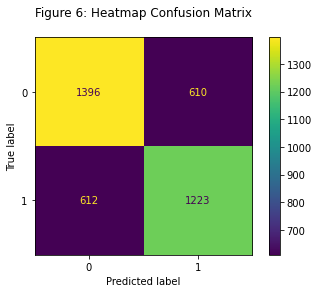

In [ ]:
# visualize confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix(y_true, y_pred), display_labels=regrl.classes_)
plt.figure(figsize=(8, 5))
disp.plot()
plt.title ("Figure 6: Heatmap Confusion Matrix\n")
plt.show()

In [ ]:
# classification report
print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

           0       0.70      0.70      0.70      2006
           1       0.67      0.67      0.67      1835

    accuracy                           0.68      3841
   macro avg       0.68      0.68      0.68      3841
weighted avg       0.68      0.68      0.68      3841



Based on the confusion matrix above, the model has 1223 true positives, 610 false positives, 1396 true negatives and 612 false negatives. This yields a true positive rate of 67% and a false positive rate of 33%; true negative rate of 70% and a false negative rate of 30%. In other words, our model predicts that hit movie is true when it is actually true 67% of the time, and it mistakenly predicts that hit movie is true when it is actually false 33% of the time. 

**AUC - ROC Curve**

An ROC curve (receiver operating characteristic curve) is a graph showing the performance of a classification model at all classification thresholds. This curve plots two parameters:

True Positive Rate
False Positive Rate

AUC stands for "Area under the ROC Curve." That is, AUC measures the entire two-dimensional area underneath the entire ROC curve (think integral calculus) from (0,0) to (1,1).

AUC represents the probability that a random positive (green) example is positioned to the right of a random negative (red) example.

AUC: 0.761


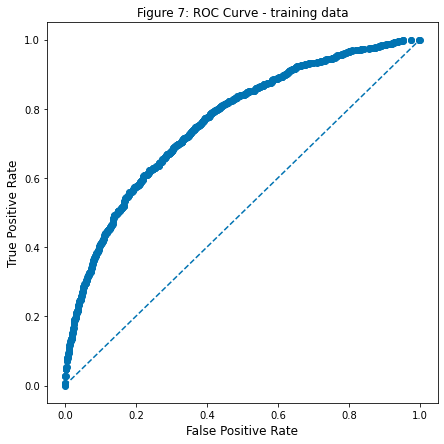

In [ ]:
model_probs = regrl.predict_proba(X_train)
y_score = model_probs[:, 1]
fpr, tpr, _ = roc_curve(y_train, y_score)
auc = roc_auc_score(y_train, y_score)

print ("AUC:", round(auc,3))

plt.figure(figsize=(7, 7))
plt.scatter(fpr, tpr)
plt.plot([0,1],[0,1], linestyle="dashed")
plt.title("Figure 7: ROC Curve - training data")
plt.xlabel("False Positive Rate", size=12)
plt.ylabel("True Positive Rate", size=12);
plt.show()

AUC ranges in value from 0 to 1. A model whose predictions are 100% wrong has an AUC of 0.0; one whose predictions are 100% correct has an AUC of 1.0.

The model achieved AUC=0.761 which means predictions are 76.1% correct based on training data.

AUC: 0.739


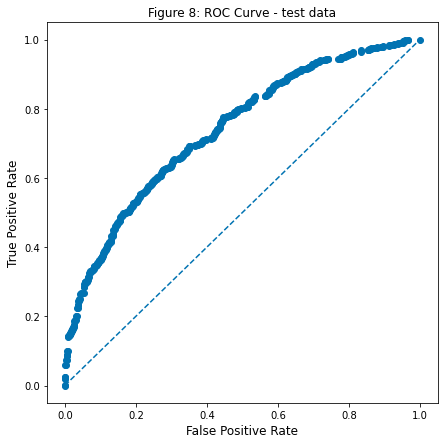

In [ ]:
model_probs = regrl.predict_proba(X_test)
y_score = model_probs[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_score)
auc = roc_auc_score(y_test, y_score)

print ("AUC:", round(auc,3))

plt.figure(figsize=(7, 7))
plt.scatter(fpr, tpr)
plt.plot([0,1],[0,1], linestyle="dashed")
plt.title("Figure 8: ROC Curve - test data")
plt.xlabel("False Positive Rate", size=12)
plt.ylabel("True Positive Rate", size=12);
plt.show()

The model achieved AUC=0.739 which means predictions are 73.9% correct based on test data. The number is in line with the number got using training data. 

### **4.5.4 Model interpretation**

Some noteworthy findings from the logistic regression model include:

* Movies with a famous director has 26.1% higher odds of being a hit movie.

* Including one movie star will increase the odds of hit movie by 16.6%.

* For each 10% increase in critics and audience rating score, the odds of being a hit movie will increase by 15.4% and 25.5 % respectively 

* Movies receiving a high number of audience reviews are more likely to become a hit movie.

* PG, PG-13 movies has 30.4% and 14.7% higher odds becoming a hit movie than R-rated movies.

* Horror movies are the most likely to become a hit movie. Action & adventure movies are the least likely to become a hit movie. Producing a horror movie has 6 times higher odds of being a hit movie than action & adventure movie.

* Movies released in January, February, March, and June are more likely to become a hit movie than movies released in December.

* Although earlier visualizations showed that runtime does not have a significant effect on the success of a movie, the logistic regression model shows that movies longer than 135 minutes are the least likely to become a hit movie and movies shorter than 90 minutes are the most likely to become a hit movie.

# **5. Conclusion**

Data science is becoming increasingly important to most, if not all, industries and film is not an exception. Descriptive analytics allow movie studios to determine the genre of film to make, how many top-ranked actors to hire, whether to hire a top-ranked director, the month to release the movie, how much should be allocated to the budget, etc.   

Movie studios can employ a predictive model to estimate worldwide box office revenue and whether a movie will be a hit or flop. This can be accomplished using information such as genre, content rating, budget, number of top-ranked actors and directors, and tomatometer rating once reviews are widely available. Of course, the multivariate linear regression and logistic regression models described above are not perfect. Depending on the box office and success of the movie, studios can adjust the model. If a movie preformed poorly, studios can use descriptive analysis to compare factors involved in producing the movie to those of similar or better performing movies. Any new factors can be added to the model to increase accuracy for better future predictions.

At the start of the film's release, critics and audience ratings, as well as the quantity of audience reviews, are unavailable. However, as film becomes more widely available, they continue to play an essential role in consumer decision-making in general and movie selection in particular. The finest advertising is a high review score and a large number of reviews, which can have a beneficial impact on the total box office. Of fact, a low quantity of reviews and a bad rating might damage a film's box office results. The findings on movie reviews and box office success reveal how film studios can strategically control the review process to boost box office revenue.

# **6. Data limitation**

1.   Budget numbers for movies can be both difficult to find and unreliable. Studios and film-makers often try to keep the information secret and will use accounting tricks to inflate or reduce announced budgets. An inaccurate budget could incorrectly show trends in a movie's box office and success and could also affect accuracy when predicting a movie's box office and success.

2.   A hit/flop flag is derived by production budget + marketing and box office ratio. Because of limited information collected, I applied assumption production budget accounts for the whole cost of production and distribution. For movies with high budgets, marketing cost is likely high; for movies with low budgets, marketing cost is likely low.  So a movie with a big budget could have a higher chance of being calculated as a hit movie.

3.  Popular directors and actors are derived based on total worldwide box office of all time and each individual year, respectively. Since the dataset only includes about 4000 movies and most were released after 1980s, directors and actors who were mainly successful in 1970s or earlier, or whose successful movies are not included in this dataset are not likely to be derived as popular directors or actors.

4. Each movie could have one, two or more main actors. However, this can't be identified programmatically. My algorithm considers the first two names in the actor field as the main actors. When I derive popular actors, this could underestimate the influence of popular actors for movies with more than two main actors like Avengers.

5. I regrouped some attributes because of the small number in some categories of the attributes. The regrouping could remove some characteristics of the data. For example, I grouped genre Art House & International, Documentary, Classics, Kids & Family, Science Fiction & Fantasy, Musical & Performing Arts, Romance, Cult Movies, Western into a new category called Other. Each genre might affect box office differently, but the new "Other" group  will take them as the same and hide these different effects.

# **7. Source code**

Source code for movie budget and box office data web scraping at (https://www.dropbox.com/s/b8x7dtuwmyul06t/movie_budget_boxoffice_web_scraping.ipynb?dl=1)

Source code for data cleaning, integration and preparation at (https://www.dropbox.com/s/ihewlwevojh5e46/source_code.ipynb?dl=1).

# **8. Acknowledgments**

1.   Rotten tomatoes movies dataset at kaggle.com (https://www.kaggle.com/stefanoleone992/rotten-tomatoes-movies-and-critic-reviews-dataset) 
2.   box office dataset at the-numbers.com (https://www.the-numbers.com/movie/budgets/all).
3.   What are the criteria for a movie hit and flop. (https://www.quora.com/What-are-the-criteria-for-a-movie-hit-super-hit-blockbuster-and-flop)
4.   3 Best metrics to evaluate Regression Model (https://towardsdatascience.com/what-are-the-best-metrics-to-evaluate-your-regression-model-418ca481755b)
5.   Multiple Regression Residual Analysis and Outliers (https://www.jmp.com/en_us/statistics-knowledge-portal/what-is-multiple-regression/mlr-residual-analysis-and-outliers.html)
6.   Time Isn’t Money: Does Runtime Affect a Film’s Box Office? (https://filmanddigitalmedia.wordpress.com/2017/10/19/time-isnt-money-does-runtime-affect-a-films-box-office/)
7.   What is genre and how is it determined (https://milnepublishing.geneseo.edu/exploring-movie-construction-and-production/chapter/2-what-is-genre-and-how-is-it-determined/)
8.   About Rotten Tomatoes (https://www.rottentomatoes.com/about)
9.   Testing the assumptions of linear regression (https://people.duke.edu/~rnau/testing.htm)
10.   scikit-learn (https://scikit-learn.org/stable/index.html)
11.   Seaborn: statistical data visualization (https://seaborn.pydata.org/index.html#)
12.  SciPy Fundamental algorithms for scientific computing in Python (https://scipy.org/)

# **9. Appendix**

## **Data Cleaning**

### **Raw data collection**

**Rotten tomatoes movies dataset**

Rotten tomatoes movies dataset was collected from the website kaggle.com (https://www.kaggle.com/stefanoleone992/rotten-tomatoes-movies-and-critic-reviews-dataset). In the movies dataset each record represents a movie available on rotten tomatoes, with the URL used for the scraping, movie title, description, genres, duration, director, actors, users' ratings, and critics' ratings.

**Box office dataset**

Box office dataset is published on website the-numbers.com (https://www.the-numbers.com/movie/budgets/all). The dataset listed movies by movie budget in descreasing order.

### **Raw data cleaning**

**Rotten tomatoes movies dataset:**

1.   Attributes rotten_tomatoes_link, movie_info, critics__concensus, streaming_release_date, production_company, tomatometer_top_critics_count, tomatometer_fresh_critics_count, and
tomatometer_rotten_critics_count are removed because they are either irrelavent or not used for analysis.
2.   Records with missing value in variables movie_title, runtime, original_release_date, content_rating, genres, tomatometer_status, audience_status, and audience_count were removed because movie_title and original_release_date are the keys used to merge with box office dataset. Attributes content_rating, genres, tomatometer_status, audience_status, and audience_count were used for analysis but couldn't be imputed (could not estimate a value for the missing variables).
3.   Converted original_release_date from string to date type.
4.   Removed duplicate records by keys i.e., movie title and original release year.

**Box office dataset:**

It had been examined that there are no missing values in any of the fields of box office dataset. But we need to:

1.   Remove records with invalid values for records in which domestic box office and worldwide box office = 0. 
2.   Remove records with invalid values for records with release date = unknown. 
3.   Convert rel_date from string to date type.
4.   Convert numeric value with "$" from string to numeric type.
5.   Remove attribute ID from the dataset since it is irrelevant.
6.   Remove outlier (revenue > \\$1.5 billion).

### **Data integration and preparation**

How to make models better by improving the quality of the data going into them? For the most part, this is not a matter of obtaining additional data sources; it is about defining new variables that express the information inherent in the data in ways that make the information more useful or more readily available. Derived variables can improve model performance and enhance the ability of models to be understood and interpreted.

In this project, I had done multiple ways to create new variables taking advantage of important characteristics already known. I extracted movie release month from movie release date. I derived hit/flop flag defining a successful movie or not. I derived popular director and actors from director and actor list. I also derived categorical variables from continuous attributes and created variables by regrouping categories of existing categorical attributes.

1.   **Merged rotten tomatoes movies dataset and box office dataset** <br>
     The two datasets were merged by movie title and release year. Only matched records were kept. Then removed variables rel_date, rel_year and movie which are not needed for analysis
2.   **Derived movie release month**<br>
     Timing of movie release (timing is usually examed by month) could impact box office significantly. For example, holiday season is used to attracting a larger audiences.
3.   **Derived hit/flop movie flag**<br>
     There are a lot different definitions of a hit/flop movie. Because of data limitation, I followed the definition below: <br>
     If we’ll simplify it to the formula, we’ll see that for movies with budgets over \\$50 million: <br>
     Movie that earned more than 4x budget+marketing is a super hit.<br>
     Movie that earned more than 2.5x budget+marketing is a blockbuster.<br>
     Movie that earned more than 1.5x budget+marketing is a minor success.<br>
     Movie that earned less than budget+marketing is a flop.<br>
     Movie that earned less than 3/4 of budget+marketing is a box office bomb.<br>
     For movies under \\$1-49 million:<br>
     Movie that earned more than 2x budget+marketing is a hit.<br>
     Movie that earned more than 1.3x budget+marketing is a minor success.<br>
     For movies under \\$1 million:<br>
     Movie that earned 2x budget+marketing is a great success.<br>
     Movie that earned more than budget+marketing is a big success.<br>
     Movie that received distribution and earned at least something in the office is a success.<br>
     source: [https://www.quora.com/What-are-the-criteria-for-a-movie-hit-super-hit-blockbuster-and-flop](https://www.quora.com/What-are-the-criteria-for-a-movie-hit-super-hit-blockbuster-and-flop)<br>
     A hit movie is defined as a blockbuster, a hit or big success. Because only production budget was collected, the assumption was that production budget accounted for the whole cost (budget+marketing).<br>
4.   **Derived main genre and created grouped genres variable**<br>
     In database, genre field includes multiple genres and is separated by comma, but only the first one is movie's main genre<br>
     There are more than ten different genres and most of them are unpopular genres. Only a small number of movies is in each genre. Using these levels as-is for modeling could lead to all sorts of issues because there are just so many. A lot of statistical precision would be thrown away to use them, and the results are hard to interpret. Also people are rarely interested in specific genres; people are much more likely to be interested in broad categories (subgroups) of genres. By finding frequency of each genre, I grouped the genres with small number of movies to genre "Other".<br>
5.   **Derived audience count categorical variable**<br>
     The histogram shows that a small number of movies received extremely high number of audience reviews (more than 10 times higher than other movies). I tried to verify the numbers on rotten tomatoes website, but for each movie, rotten tomatoes only shows the number of audience reviews in categories i.e. 250,000+, 100,000+, 50,000+, 25,000+, 10,000+, 5,000+, 2,500+, 1000+, 500+, 250+ ... ... For analysis, I mimicked rotten tomatoes way to create a categorical attribute following rotten tomatoes audience count categories. Because of the small number of values in the less than 1000 reviews categories, these values were grouped into category "<1000".<br>
6.   **Created grouped content rating vairable**<br>
     For the same reason as genres, I grouped NC17 to R. My grouping assumption is that NC17 and R have the similar audience population definition.<br>
7.   **Derive popular director**<br>
     Well-known director could impact box office significantly. I googled director rank. The popular ranking method is based on all time worldwide box office. I assigned the top 100 directors based on box office as popular director.<br>
8.   **Derived the number of popular actors**<br>
     Movie star is crucial to box office. I ranked actors based on yearly total worldwide box office for movies the actor is main actor. I counted the top 10 actors each year for movies released between 1990 and 2020 as popular actor. Because of the limited movies released before 1990 in the dataset,  I counted the top 2 actors each year for movies released between 1980 and 1990, top 1 actor each year for movies released before 1980 as popular actor. For each movie, if one of the main actors is a popular actor, pop_actor = 1, if both of the main actors are popular actor, pop_actor=2.

9.  **Created variable grouping tomatometer rating and audience rating based on 0-100\% scale.** <br>
    For analysis purpose, I divided tomatometer and audience rating based on 0-100\% scale into 10 groups i.e. 0-10, 11-20, ... ... 91-100. This provides me the other way to learn data.

10.   **Created variable grouping tomatometer score**<br>
     For analysis purpose, I grouped Certified-Fresh into Fresh. Because Certified-Fresh is a subset of Fresh, the grouping strategy doesn't change the meaning of categry Fresh. 

11. **Create numeric variables for all categorical variables**<br>
    For all categorical variables, I created a derived variable in numeric value for modeling purpose. 

# **10. Source code**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
#Read csv data
df_rt = pd.read_csv("rotten_tomatoes_movies.csv",
    parse_dates=True,
    infer_datetime_format=True,
    low_memory=False,
    encoding="ISO-8859-1")
df_bx = pd.read_csv("box_office.csv",
    parse_dates=True,
    infer_datetime_format=True,
    low_memory=False)

In [ ]:
#Data cleaning
#Rotten tomatoes movies and movie box offfice datasets cleaning:

#a1 remove variables not needed
df_rt_dev=df_rt.drop(columns={"rotten_tomatoes_link", "movie_info", "critics_consensus", "authors", "streaming_release_date", "production_company", "tomatometer_count", "tomatometer_top_critics_count", "tomatometer_fresh_critics_count", "tomatometer_rotten_critics_count"})

In [ ]:
#a2 remove records with missing value for variables below
df_rt_dev.dropna(subset=["movie_title", "original_release_date", "content_rating", "genres", "tomatometer_status", "audience_status", "audience_count","runtime"], inplace=True) 

In [ ]:
#a3 remove duplicate records
df_rt_dev.drop_duplicates(subset=['movie_title', 'original_release_date'], keep='last', inplace=True)

In [ ]:
#a4 convert original_release_date from string to date type
df_rt_dev["original_release_date"] = pd.to_datetime(df_rt_dev["original_release_date"], format="%m/%d/%Y")

In [ ]:
#b1. remove variables not needed
df_bx_dev=df_bx.drop(columns={"ID"})

In [ ]:
#b2. convert rel_date from string to date type
#data cleaning remove records which release date is unknown.
df_bx_dev.drop(df_bx_dev[df_bx_dev["rel_date"]=="Unknown"].index, inplace=True)
df_bx_dev["rel_date"] = pd.to_datetime(df_bx_dev["rel_date"], format="%m/%d/%y", errors='coerce')
#convert character numbers to numeric
df_bx_dev[df_bx_dev.columns[2:]] = df_bx_dev[df_bx_dev.columns[2:]].replace('[\$,]', '', regex=True).astype(float)

In [ ]:
#b3 remove missing records
df_bx_dev.dropna(subset=["rel_date", "movie", "budget", "d_gross", "w_gross"], inplace=True) 
#remove d_gross=0 and w_gross=0 records
df_bx_dev=df_bx_dev[(df_bx_dev["w_gross"]!=0) & (df_bx_dev["d_gross"]!=0)]

In [ ]:
#b4 remove duplicate records
df_bx_dev.drop_duplicates(subset=["movie", "rel_date"], keep='last', inplace=True)

In [ ]:
#derive movie release year from original_release_date for merging purpose.
df_rt_dev['releaseYear']=df_rt_dev["original_release_date"].dt.year#derive movie release year from original_release_date for merging purpose.
df_rt_dev['releaseYear']=df_rt_dev["original_release_date"].dt.year

In [ ]:
#derive release year from rel_date for merging purpsoe.
df_bx_dev['rel_year']=df_bx_dev["rel_date"].dt.year

In [ ]:
#create analysis dataset by merging rotten tomato rating database with box office database.
df_rt_bx = df_rt_dev.merge(df_bx_dev, how='inner', left_on=["movie_title", "releaseYear"], right_on=["movie", "rel_year"])

In [ ]:
df_rt_bx.drop(columns={'rel_date', 'movie', 'rel_year'}, inplace=True)

<AxesSubplot:>

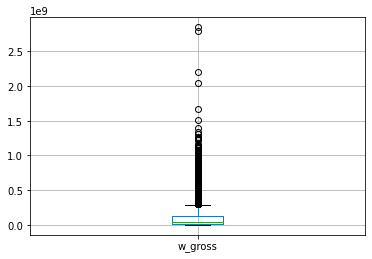

In [ ]:
df_rt_bx.boxplot(column=['w_gross'], return_type='axes')

In [ ]:
#remove outliers > 1500000000
df_rt_bx=df_rt_bx[(df_rt_bx['w_gross']<1500000000)]

In [ ]:
#1. create varaible release month
df_rt_bx['releaseMonth']=df_rt_bx["original_release_date"].dt.month

In [ ]:
print ("Frequency of released month \n")
print (df_rt_bx['releaseMonth'].value_counts())

Frequency of released month 

10    413
12    380
9     355
8     349
11    342
6     334
3     316
7     303
4     301
5     264
2     249
1     235
Name: releaseMonth, dtype: int64


In [ ]:
#2 create hit, flop flag, hit = big success per definition above, otherwise, flag=flop
#df_rt_bx["ratio"]=df_bx["w_gross"]/df_bx["budget"]
df_rt_bx["hit_flop_flag"]='Flop'
for index, row in df_rt_bx.iterrows():
    if row["budget"]>=50000000 and row["w_gross"]/row["budget"]>2.5:
       df_rt_bx.at[index,'hit_flop_flag']='Hit'
    if row["budget"]<50000000 and row["budget"]>=1000000 and row["w_gross"]/row["budget"]>2:
       df_rt_bx.at[index,'hit_flop_flag']='Hit'
    if row["budget"]<1000000 and row["w_gross"]/row["budget"]>1:
       df_rt_bx.at[index,'hit_flop_flag']='Hit'

In [ ]:
print ("Frequency of hit_flag_flag \n")
print (df_rt_bx['hit_flop_flag'].value_counts())

Frequency of hit_flag_flag 

Flop    2006
Hit     1835
Name: hit_flop_flag, dtype: int64


In [ ]:
#create variable in numeric value
df_rt_bx["hit_flop_flag_n"]=0
df_rt_bx.loc[df_rt_bx["hit_flop_flag"]=="Flop", ["hit_flop_flag_n"]]=0
df_rt_bx.loc[df_rt_bx["hit_flop_flag"]=="Hit", ["hit_flop_flag_n"]]=1

In [ ]:
#3. Genre variable includes mulitple genres, but only the first one is main genre. Split genres and take the first one as main genre.
df_rt_bx["main_genre"]=df_rt_bx["genres"].str.split(",").str[0]

In [ ]:
#Run frequency of movies by genre
print ("Frequency of main genre \n")
print (df_rt_bx['main_genre'].value_counts())

Frequency of main genre 

Action & Adventure           1187
Comedy                       1067
Drama                         946
Horror                        224
Art House & International     112
Animation                     107
Mystery & Suspense             75
Documentary                    54
Classics                       36
Science Fiction & Fantasy      13
Kids & Family                  12
Musical & Performing Arts       4
Romance                         2
Cult Movies                     1
Western                         1
Name: main_genre, dtype: int64


In [ ]:
#The number of movies in genre other than action & adventure, comedy, drama, animation, mystery & suspense and horror is very small, I group them ito other category for analysis.
df_rt_bx["g_genre"]=df_rt_bx["main_genre"]
df_rt_bx.loc[~df_rt_bx["main_genre"].isin(["Action & Adventure","Comedy","Drama","Horror","Animation", "Mystery & Suspense"]), ['g_genre']] = 'Other'

In [ ]:
#Run frequency of g_genre
print ("Frequency of genre group \n")
print (df_rt_bx['g_genre'].value_counts())

Frequency of genre group 

Action & Adventure    1187
Comedy                1067
Drama                  946
Other                  235
Horror                 224
Animation              107
Mystery & Suspense      75
Name: g_genre, dtype: int64


In [ ]:
#create variable in numeric value
df_rt_bx["g_genre_n"]=0
df_rt_bx.loc[df_rt_bx["g_genre"]=="Action & Adventure", ["g_genre_n"]]=1
df_rt_bx.loc[df_rt_bx["g_genre"]=="Animation", ["g_genre_n"]]=2
df_rt_bx.loc[df_rt_bx["g_genre"]=="Comedy", ["g_genre_n"]]=3
df_rt_bx.loc[df_rt_bx["g_genre"]=="Drama", ["g_genre_n"]]=4
df_rt_bx.loc[df_rt_bx["g_genre"]=="Horror", ["g_genre_n"]]=5
df_rt_bx.loc[df_rt_bx["g_genre"]=="Mystery & Suspense", ["g_genre_n"]]=6
df_rt_bx.loc[df_rt_bx["g_genre"]=="Other", ["g_genre_n"]]=7

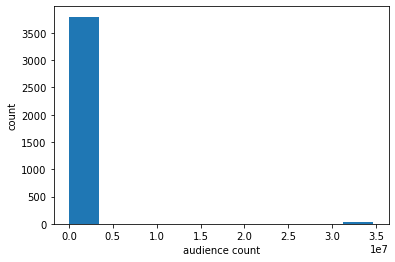

In [ ]:
#4 create categorical variable for audience count.
plt.xlabel('audience count')
plt.ylabel('count')
plt.hist(df_rt_bx["audience_count"]);

In [ ]:
#group audience count.
df_rt_bx["g_audience_count"]="0"
#df_rt_bx.loc[(df_rt_bx["audience_count"].between(0,250)==True), ['g_audience_count']] = 0
#df_rt_bx.loc[(df_rt_bx["audience_count"].between(250,500, inclusive='right')==True), ['g_audience_count']] = 250
df_rt_bx.loc[(df_rt_bx["audience_count"].between(0,1000, inclusive='right')==True), ['g_audience_count']] = "<=1000"
df_rt_bx.loc[(df_rt_bx["audience_count"].between(1000,2500, inclusive='right')==True), ['g_audience_count']] = "1000+"
df_rt_bx.loc[(df_rt_bx["audience_count"].between(2500,5000, inclusive='right')==True), ['g_audience_count']] = "2500+"
df_rt_bx.loc[(df_rt_bx["audience_count"].between(5000,10000, inclusive='right')==True), ['g_audience_count']] = "5000+"
df_rt_bx.loc[(df_rt_bx["audience_count"].between(10000,25000, inclusive='right')==True), ['g_audience_count']] = "10000+"
df_rt_bx.loc[(df_rt_bx["audience_count"].between(25000,50000, inclusive='right')==True), ['g_audience_count']] = "25000+"
df_rt_bx.loc[(df_rt_bx["audience_count"].between(50000,100000, inclusive='right')==True), ['g_audience_count']] = "50000+"
df_rt_bx.loc[(df_rt_bx["audience_count"].between(100000,250000, inclusive='right')==True), ['g_audience_count']] = "100000+"
df_rt_bx.loc[df_rt_bx["audience_count"]>250000, ['g_audience_count']] = "250000+"

In [ ]:
#Run frequency of g_audience_count
print ("Frequency of grouped audience count")
print (df_rt_bx['g_audience_count'].value_counts())

Frequency of grouped audience count
250000+    810
50000+     663
100000+    603
25000+     583
10000+     498
5000+      316
2500+      150
1000+      128
<=1000      90
Name: g_audience_count, dtype: int64


In [ ]:
#create variable in numeric value
df_rt_bx["g_audience_count_n"]=0
df_rt_bx.loc[df_rt_bx["g_audience_count"]=="< 1000", ["g_audience_count_n"]]=1
df_rt_bx.loc[df_rt_bx["g_audience_count"]=="1000+", ["g_audience_count_n"]]=2
df_rt_bx.loc[df_rt_bx["g_audience_count"]=="2500+", ["g_audience_count_n"]]=3
df_rt_bx.loc[df_rt_bx["g_audience_count"]=="5000+", ["g_audience_count_n"]]=4
df_rt_bx.loc[df_rt_bx["g_audience_count"]=="10000+", ["g_audience_count_n"]]=5
df_rt_bx.loc[df_rt_bx["g_audience_count"]=="25000+", ["g_audience_count_n"]]=6
df_rt_bx.loc[df_rt_bx["g_audience_count"]=="50000+", ["g_audience_count_n"]]=7
df_rt_bx.loc[df_rt_bx["g_audience_count"]=="100000+", ["g_audience_count_n"]]=8
df_rt_bx.loc[df_rt_bx["g_audience_count"]=="250000+", ["g_audience_count_n"]]=9

In [ ]:
#5 create categorical varaible for content rating.
#Run frequency of movies by content rating
print ("Frequency of content rating \n")
print (df_rt_bx['content_rating'].value_counts())

Frequency of content rating 

R        1745
PG-13    1352
PG        592
G          79
NR         66
NC17        7
Name: content_rating, dtype: int64


In [ ]:
#group NC17 to R because of small number of movies in the category and NC17 and R movies have a lot similarities.
df_rt_bx["g_content_rating"]=df_rt_bx["content_rating"]
df_rt_bx.loc[df_rt_bx["content_rating"].isin(["NC17"]), ['g_content_rating']] = 'R'
#df_rt_bx.loc[df_rt_bx["content_rating"].isin(["G"]), ['g_content_rating']] = 'PG'

In [ ]:
#Run frequency of g_content_rating
print ("Frequency of grouped content rating")
print (df_rt_bx['g_content_rating'].value_counts())

Frequency of grouped content rating
R        1752
PG-13    1352
PG        592
G          79
NR         66
Name: g_content_rating, dtype: int64


In [ ]:
#create variable in numeric value
df_rt_bx["g_content_rating_n"]=0
df_rt_bx.loc[df_rt_bx["g_content_rating"]=="G", ["g_content_rating_n"]]=1
df_rt_bx.loc[df_rt_bx["g_content_rating"]=="PG", ["g_content_rating_n"]]=2
df_rt_bx.loc[df_rt_bx["g_content_rating"]=="PG-13", ["g_content_rating_n"]]=3
df_rt_bx.loc[df_rt_bx["g_content_rating"]=="NR", ["g_content_rating_n"]]=4
df_rt_bx.loc[df_rt_bx["g_content_rating"]=="R", ["g_content_rating_n"]]=5

In [ ]:
#Run frequency of movies by genre
print ("Frequency of movie release year \n")
print (df_rt_bx['releaseYear'].value_counts())

Frequency of movie release year 

2010    190
2006    186
2008    181
2011    177
2012    167
2002    156
2009    156
2007    150
2004    150
2016    149
2013    147
2014    145
2005    144
2015    142
2003    142
2000    137
1999    137
2001    134
2018    126
2017    117
1998    114
1996     80
1997     73
1995     57
2019     41
1994     38
1993     35
1992     31
1986     25
1988     25
1991     24
1990     23
1989     23
1987     22
1985     21
1984     21
1981     21
1980     21
1982     20
1983     16
1979     11
1977      8
1978      8
1974      8
1970      7
1976      7
1975      6
1973      6
1969      6
1971      5
1972      3
2020      2
Name: releaseYear, dtype: int64


In [ ]:
#6 create variable for main director and main actors.
# The direct variable includes multiple names, only the first name is main director.
# The actor variable includes multiple names, I take the first two names as main actors.
#Split directors, the first one is considered as main director.
df_rt_bx["main_director"]=df_rt_bx["directors"].str.split(",").str[0]
df_rt_bx["main_actor1"]=df_rt_bx["actors"].str.split(",").str[0]
df_rt_bx["main_actor2"]=df_rt_bx["actors"].str.split(",").str[1]

In [ ]:
#7 create variable pop_director and pop_actor. Popularity of director and leading actors is crucial to box office. I google director and actor rank. The main ranking mehtod is based
#  on total worldwide box office for director and total worldwide box office at the year for actor. pop_director=1 indicates the movie includes top ranked director. pop_actor=1 indicates 
#  the movie includes 1 top ranked actor. pop_actor=2 indicates the movie includes 2 top ranked actors.
#  derive pop director, directors are ranked based on total box office all time. Top 100 are derived as popular
df_rank_dir=df_rt_bx
df_rank_dir1=df_rank_dir.groupby("main_director").agg({"w_gross":"sum"})
df_rank_dir1.reset_index(inplace=True)
df_rank_dir1["gross_rank"]=df_rank_dir1["w_gross"].rank(ascending=False)
df_rank_dir1=df_rank_dir1[df_rank_dir1["gross_rank"]<=100]
df_rank_dir1.sort_values(by="gross_rank", inplace=True)
df_rank_dir=df_rank_dir1[["main_director"]]

In [ ]:
#derive pop actor for main_actor1, actors are ranked based on total box office of the year. Top 10 for year > 1990, top 2 for year between 1980 and 1990, top 1 for year before 1980 are derived as popular. pop_actor can be 0, 1, 2
df_rank_act1=df_rt_bx
df_rank_act11=df_rank_act1.groupby(["releaseYear","main_actor1"]).agg({"w_gross":"sum"})
df_rank_act11.reset_index(inplace=True)
df_rank_act11.sort_values(["releaseYear","w_gross"], inplace=True)
df_rank_act11["gross_rank"]=df_rank_act11.groupby("releaseYear")["w_gross"].rank(ascending=False)
#df_rank_act1=df_rank_act11[df_rank_act11["gross_rank"]<=10]
df_rank_act1=df_rank_act11.loc[((df_rank_act11["gross_rank"]<=10) & (df_rank_act11['releaseYear'].between(1990,2020))) | ((df_rank_act11["gross_rank"]<=1) & (df_rank_act11['releaseYear']<1980)) | ((df_rank_act11["gross_rank"]<=2) & (df_rank_act11['releaseYear']<=1990))]
df_rank_act1=df_rank_act1[["main_actor1"]]
#remove duplicates
df_rank_act1.drop_duplicates(subset="main_actor1",keep='last', inplace=True)

In [ ]:
#derive pop actor for main_actor2, actors are ranked based on total box office of the year. Top 10 for year > 1990, top 2 for year between 1980 and 1990, top 1 for year before 1980 are derived as popular. pop_actor can be 0, 1, 2
df_rank_act2=df_rt_bx
df_rank_act21=df_rank_act2.groupby(["releaseYear","main_actor2"]).agg({"w_gross":"sum"})
df_rank_act21.reset_index(inplace=True)
df_rank_act21.sort_values(["releaseYear","w_gross"], inplace=True)
df_rank_act21["gross_rank"]=df_rank_act21.groupby("releaseYear")["w_gross"].rank(ascending=False)
#df_rank_act2=df_rank_act21[df_rank_act21["gross_rank"]<=10]
df_rank_act2=df_rank_act21.loc[((df_rank_act21["gross_rank"]<=10) & (df_rank_act21['releaseYear'].between(1990,2020))) | ((df_rank_act21["gross_rank"]<=1) & (df_rank_act21['releaseYear']<1980)) | ((df_rank_act21["gross_rank"]<=2) & (df_rank_act21['releaseYear']<=1990))]
df_rank_act2=df_rank_act2[["main_actor2"]]
#remove duplicates
df_rank_act2.drop_duplicates(subset="main_actor2",keep='last', inplace=True)

In [ ]:
#Merge rank_dir, rank_act to derive pop_director, pop_actor flag
df_rt_bx["pop_director"]=0
df_rt_bx=df_rt_bx.merge(df_rank_dir, how="left", on="main_director", indicator=True)
df_rt_bx.loc[df_rt_bx["_merge"]=="both", ["pop_director"]]=1
df_rt_bx.drop(columns="_merge",axis=1, inplace=True)

df_rt_bx["pop_actor"]=0
df_rt_bx=df_rt_bx.merge(df_rank_act1, how="left", on="main_actor1", indicator=True)
#df_rt_bx.loc[df_rt_bx["_merge"]=="both", ["pop_actor"]]=1
for index, row in df_rt_bx.iterrows():
    if row["_merge"]=="both":
       df_rt_bx.at[index,'pop_actor']=df_rt_bx.at[index,'pop_actor']+1
df_rt_bx.drop(columns="_merge",axis=1, inplace=True)

df_rt_bx=df_rt_bx.merge(df_rank_act2, how="left", on="main_actor2", indicator=True)
#df_rt_bx.loc[df_rt_bx["_merge"]=="both", ["pop_actor"]]=1
for index, row in df_rt_bx.iterrows():
    if row["_merge"]=="both":
       df_rt_bx.at[index,'pop_actor']=df_rt_bx.at[index,'pop_actor']+1
df_rt_bx.drop(columns="_merge",axis=1, inplace=True)

In [ ]:
#Run frequency of pop_director
print (df_rt_bx['pop_director'].value_counts())

0    3156
1     685
Name: pop_director, dtype: int64


In [ ]:
#Run frequency of pop_actor
print (df_rt_bx['pop_actor'].value_counts())

0    2204
1    1044
2     593
Name: pop_actor, dtype: int64


In [ ]:
#group runtime to category 0-90, 91-135, 136+
df_rt_bx.loc[df_rt_bx['runtime'].between(0,90), ['g_runtime']]=1
df_rt_bx.loc[df_rt_bx['runtime'].between(91,135), ['g_runtime']]=2
df_rt_bx.loc[df_rt_bx['runtime'].between(136,999), ['g_runtime']]=3

In [ ]:
print (df_rt_bx['g_runtime'].value_counts())

2.0    3018
1.0     543
3.0     280
Name: g_runtime, dtype: int64


In [ ]:
#create catigorical variable for tomatometer and audience rating.

df_rt_bx["g_tomatometer_rating"]=0
df_rt_bx.loc[df_rt_bx["tomatometer_rating"].between(0,10), ["g_tomatometer_rating"]]=1
df_rt_bx.loc[df_rt_bx["tomatometer_rating"].between(11,20), ["g_tomatometer_rating"]]=2
df_rt_bx.loc[df_rt_bx["tomatometer_rating"].between(21,30), ["g_tomatometer_rating"]]=3
df_rt_bx.loc[df_rt_bx["tomatometer_rating"].between(31,40), ["g_tomatometer_rating"]]=4
df_rt_bx.loc[df_rt_bx["tomatometer_rating"].between(41,50), ["g_tomatometer_rating"]]=5
df_rt_bx.loc[df_rt_bx["tomatometer_rating"].between(51,60), ["g_tomatometer_rating"]]=6
df_rt_bx.loc[df_rt_bx["tomatometer_rating"].between(61,70), ["g_tomatometer_rating"]]=7
df_rt_bx.loc[df_rt_bx["tomatometer_rating"].between(71,80), ["g_tomatometer_rating"]]=8
df_rt_bx.loc[df_rt_bx["tomatometer_rating"].between(81,90), ["g_tomatometer_rating"]]=9
df_rt_bx.loc[df_rt_bx["tomatometer_rating"].between(91,100), ["g_tomatometer_rating"]]=10

df_rt_bx["g_audience_rating"]=0
df_rt_bx.loc[df_rt_bx["audience_rating"].between(0,10), ["g_audience_rating"]]=1
df_rt_bx.loc[df_rt_bx["audience_rating"].between(11,20), ["g_audience_rating"]]=2
df_rt_bx.loc[df_rt_bx["audience_rating"].between(21,30), ["g_audience_rating"]]=3
df_rt_bx.loc[df_rt_bx["audience_rating"].between(31,40), ["g_audience_rating"]]=4
df_rt_bx.loc[df_rt_bx["audience_rating"].between(41,50), ["g_audience_rating"]]=5
df_rt_bx.loc[df_rt_bx["audience_rating"].between(51,60), ["g_audience_rating"]]=6
df_rt_bx.loc[df_rt_bx["audience_rating"].between(61,70), ["g_audience_rating"]]=7
df_rt_bx.loc[df_rt_bx["audience_rating"].between(71,80), ["g_audience_rating"]]=8
df_rt_bx.loc[df_rt_bx["audience_rating"].between(81,90), ["g_audience_rating"]]=9
df_rt_bx.loc[df_rt_bx["audience_rating"].between(91,100), ["g_audience_rating"]]=10

In [ ]:
#combine fresh and certified-fresh into one group (fresh)
df_rt_bx["g_tomatometer_status"]=df_rt_bx["tomatometer_status"]
df_rt_bx.loc[df_rt_bx['tomatometer_status']=='Certified-Fresh',["g_tomatometer_status"]]="Fresh"

In [ ]:
#create variable in numeric value
df_rt_bx["tomatometer_status_n"]=0
df_rt_bx.loc[df_rt_bx["tomatometer_status"]=="Rotten", ["tomatometer_status_n"]]=0
df_rt_bx.loc[df_rt_bx["tomatometer_status"]=="Fresh", ["tomatometer_status_n"]]=1
df_rt_bx.loc[df_rt_bx["tomatometer_status"]=="Certified-Fresh", ["tomatometer_status_n"]]=2

df_rt_bx["audience_status_n"]=0
df_rt_bx.loc[df_rt_bx["audience_status"]=="Spilled", ["audience_status_n"]]=0
df_rt_bx.loc[df_rt_bx["audience_status"]=="Upright", ["audience_status_n"]]=1

In [ ]:
df_rt_bx.info();

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3841 entries, 0 to 3840
Data columns (total 37 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   movie_title            3841 non-null   object        
 1   content_rating         3841 non-null   object        
 2   genres                 3841 non-null   object        
 3   directors              3841 non-null   object        
 4   actors                 3841 non-null   object        
 5   original_release_date  3841 non-null   datetime64[ns]
 6   runtime                3841 non-null   float64       
 7   tomatometer_status     3841 non-null   object        
 8   tomatometer_rating     3841 non-null   float64       
 9   audience_status        3841 non-null   object        
 10  audience_rating        3841 non-null   float64       
 11  audience_count         3841 non-null   float64       
 12  releaseYear            3841 non-null   int64         
 13  bud

In [ ]:
df_rt_bx.to_csv('rottentomatoes_boxoffice.csv', index=False) 